In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

In [2]:
from datetime import datetime
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.manifold import TSNE
from sklearn import preprocessing

In [3]:
from tensorflow.keras.models import Model
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, Normalizer
import os 
import warnings
import gc
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [4]:
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from keras.layers import  MaxPool1D, Conv1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [6]:
#To show evaluation metrices: classification report, F/P, F/N
def report_heatmap(y_pred,y_test):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [7]:
df_train = pd.read_csv('kdd_train.txt', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
df_train.shape

(125973, 43)

In [9]:
#Reset column names for training set
df_train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack', 'difficulty_level']
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
df_test = pd.read_csv('kdd_test.txt', header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [12]:
df_test.shape

(22544, 43)

In [13]:
#Reset column names for testing set
df_test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack', 'difficulty_level']
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [14]:
#Merging train and test data
combined_data = pd.concat([df_train,df_test])

In [15]:
combined_data.shape

(148517, 43)

# Data Analysis

In [16]:
# map normal to 0, all attacks to 1
is_attack = combined_data.attack.map(lambda a: 0 if a == 'normal' else 1)


combined_data['attack_flag'] = is_attack


# view the result
combined_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level,attack_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [17]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
R2L_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [18]:
# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        attack_type = 'DoS'
    elif attack in probe_attacks:
        attack_type = 'Probe'
    elif attack in U2R_attacks:
        attack_type = 'U2R'
    elif attack in R2L_attacks:
        attack_type = 'R2L'
    else:
        attack_type = 'Normal'
        
    return attack_type

In [19]:
# map the data and join to the data set
attack_map = combined_data.attack.apply(map_attack)
combined_data['attack_map'] = attack_map

In [20]:
attack_vs_protocol = pd.crosstab(combined_data.attack_map, combined_data.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack_map,,,
DoS,3553,48928,906
Normal,1402,61595,14210
Probe,4375,7721,1981
R2L,4,3220,514
U2R,0,105,3


Most attacks were occured on TCP protocol

In [21]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

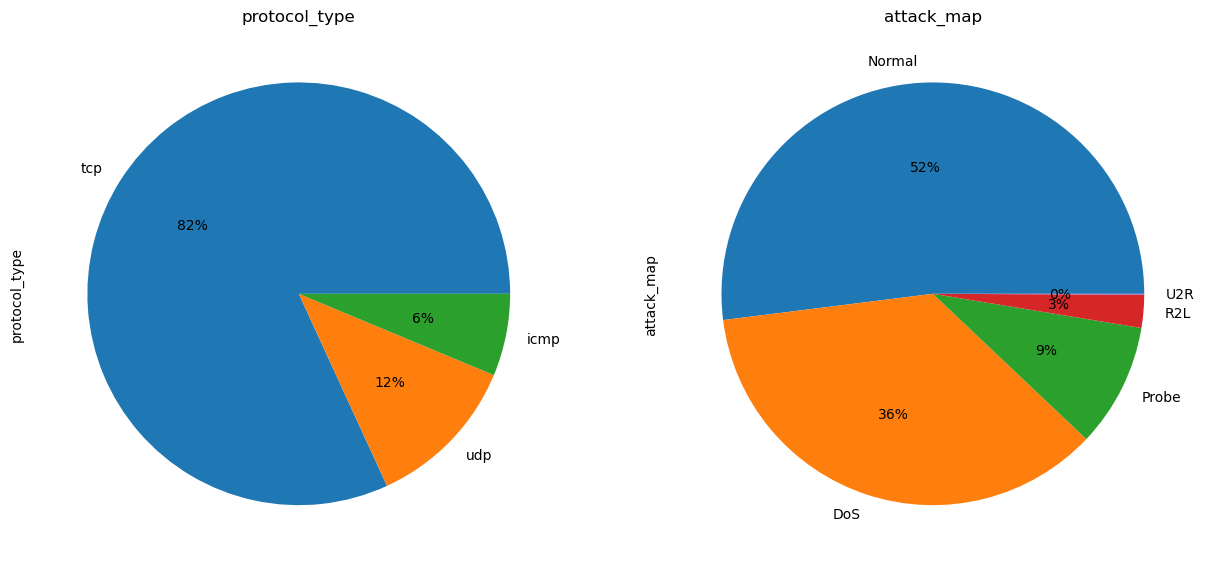

In [22]:
pie_plot(combined_data, ['protocol_type', 'attack_map'], 1, 2)

 From these charts we can notice:
- The TCP protocol is widely utilized on networks.
- Normal traffic constitutes more than 50% of the network's overall traffic.
- The DoS attack is the most commonly occurring attack on the network.

In [23]:
# build a graph legend function
def build_legend(values, labels):
    total = sum(values)
    legend_entries = []
    for i in range(len(values)):
        percentage = round(100 * values[i] / total, 1)
        entry = labels[i] + ' (' + str(percentage) + '%)'
        legend_entries.append(entry)
    return legend_entries

# helper function for drawing mulitple charts.
def bake_pies(data_list, labels, t):
    list_length = len(data_list)
    
    # set up color palettes
    color_lists = [sns.color_palette('bright'), sns.color_palette('pastel'), sns.color_palette('dark')]
    color_cycles = [itertools.cycle(colors) for colors in color_lists]
    cdicts = [{} for _ in range(list_length)]
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length, figsize=(25, 10), tight_layout=False)
    plt.subplots_adjust(wspace=0.2)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdicts[count]:
                cdicts[count][value] = next(color_cycles[count])
                
        # sort the data by values and take top 10
        data_set = data_set.sort_values(ascending=False)[:10]
       
        # build the wedges
        wedges, texts, autotexts = axs[count].pie(data_set,
                                                  colors=[cdicts[count][v] for v in data_set.index],
                                                  wedgeprops=dict(width=0.5, edgecolor='w'),
                                                  autopct='%1.1f%%',
                                                  textprops=dict(color="black", fontweight="bold", fontsize=12))
        
        # build the legend entries
        legend_entries = build_legend(data_set, data_set.index)
        
        # build the legend
        axs[count].legend(wedges, legend_entries,
                           title=t,
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        
        # set the title
        axs[count].set_title(labels[count])
    
    return axs


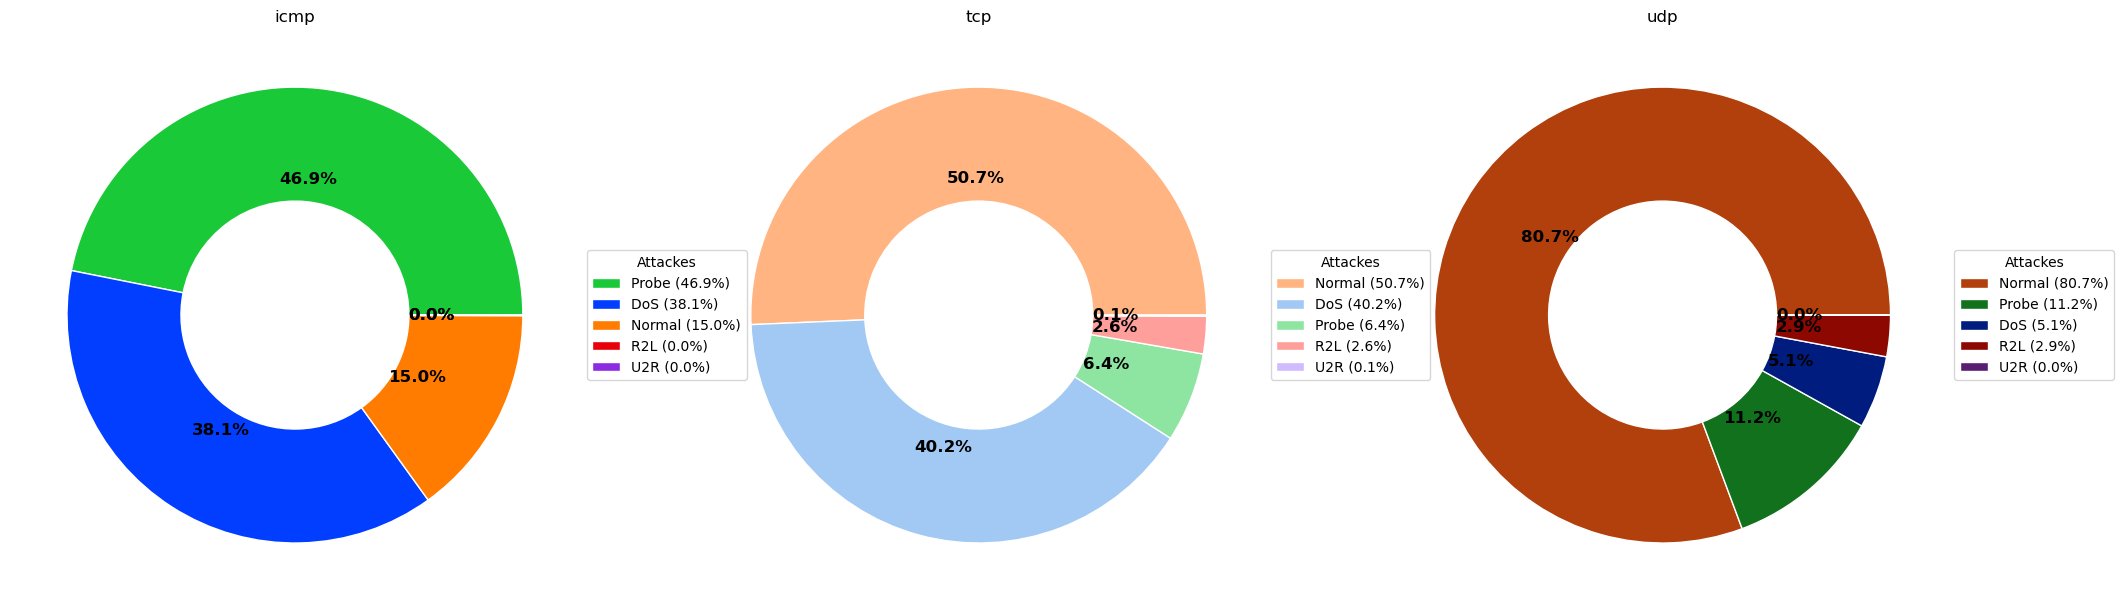

In [24]:
# get the attacks percentages for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'],'Attackes')
plt.show()

From these charts we can notice:
- Traffic on the network using ICMP protocol was more likely to be attacked, with the most common ones being Probe.
- On TCP protocol, around 50% of the traffic was normal, but 40% of the traffic was DoS attacks.
- UDP protocol appeared to be the safest protocol, with nearly 80% of the traffic being normal. However, Probe attacks were still more likely to be occurred on this protocol.

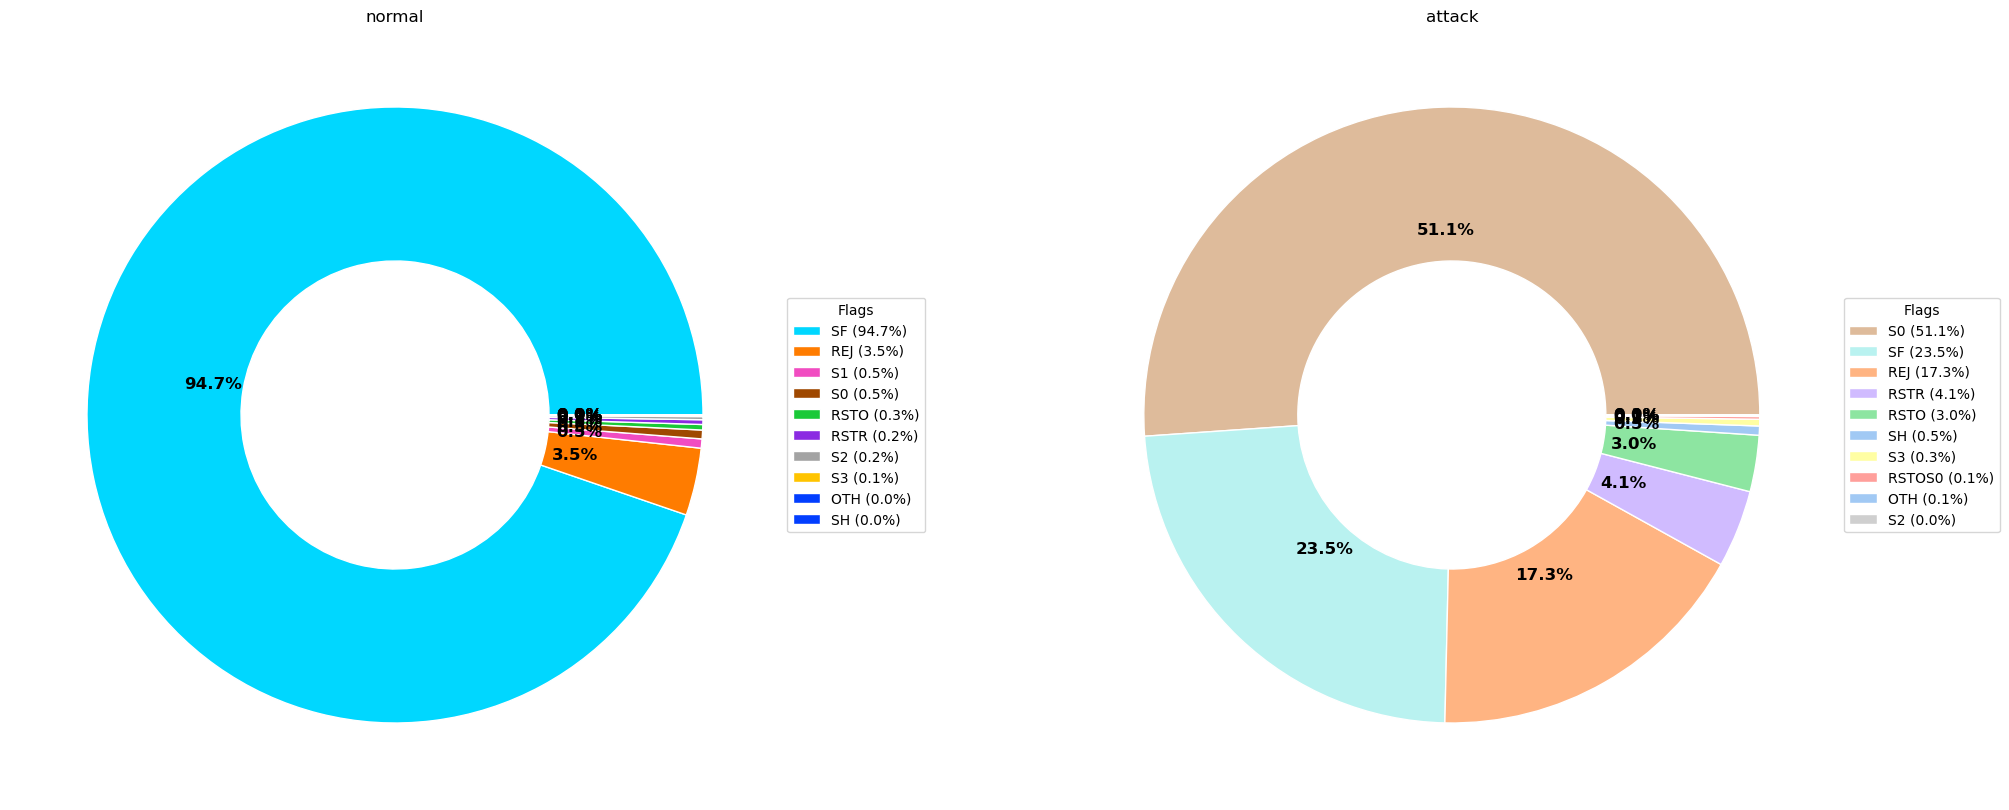

In [25]:
# get a series with the count of each flag for attack and normal traffic 
normal_flags = combined_data.loc[combined_data.attack_flag == 0].flag.value_counts()
attack_flags = combined_data.loc[combined_data.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'],'Flags')        
plt.show()

From these charts we can notice:
- Almost all the network flows were normal when the connection state(Flag) was normal (SF)
- Attacks were occured when there was an error (S0->Connection attempt seen, no reply).

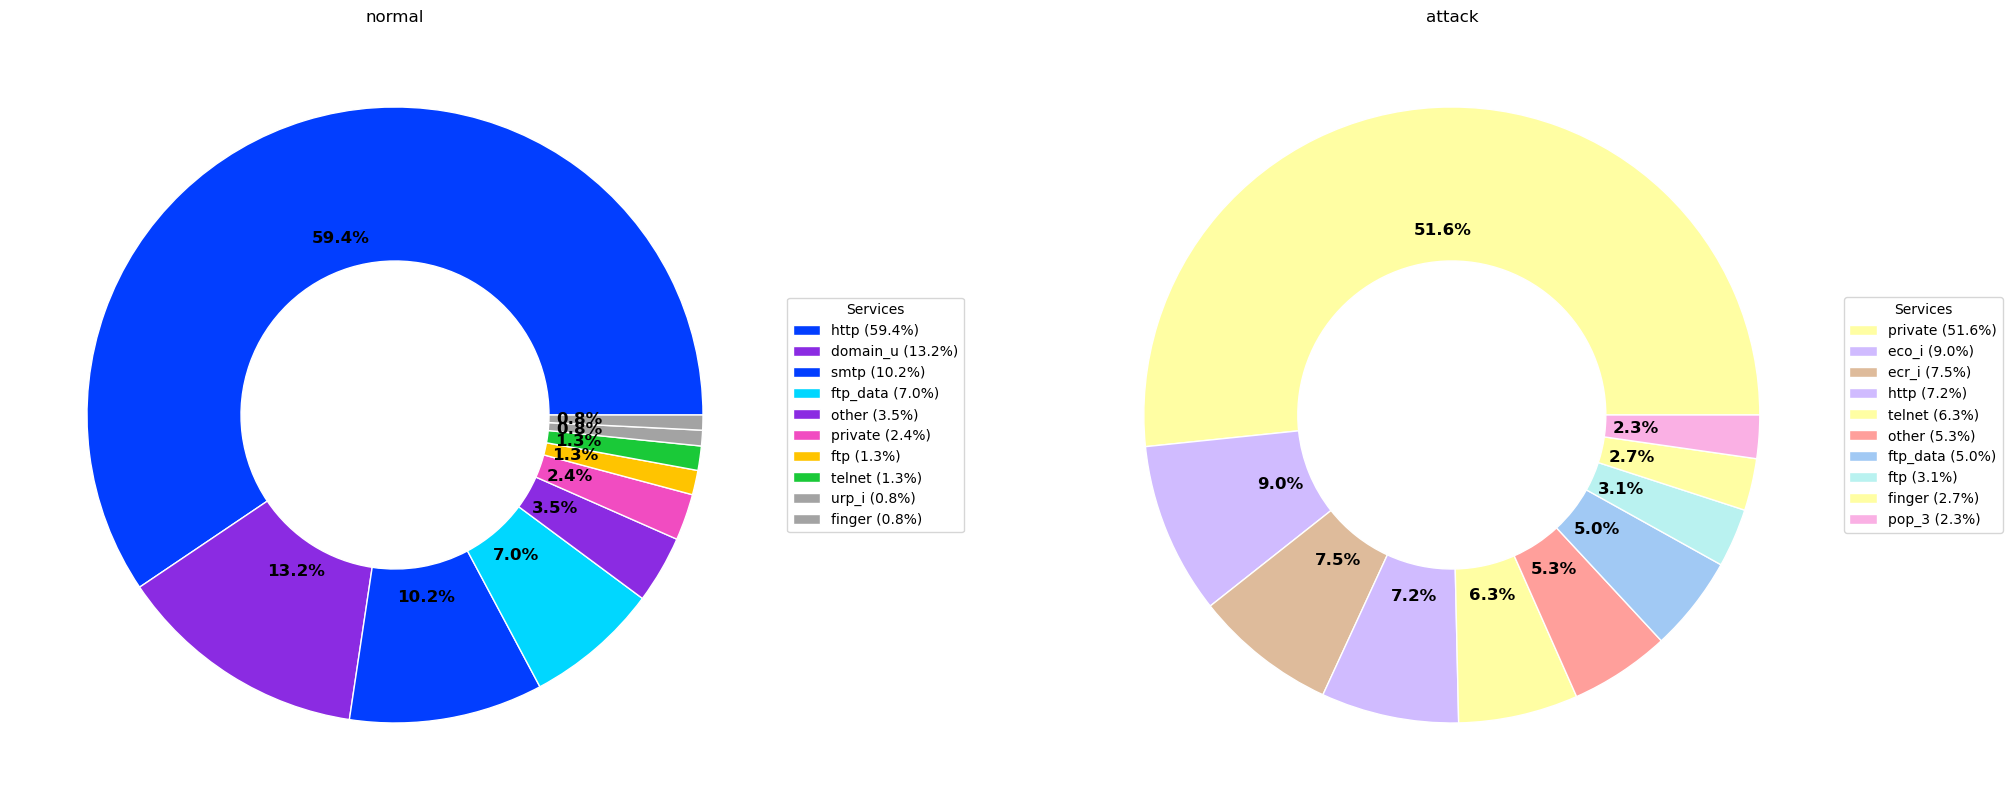

In [26]:
# get a series with the count of each service for attack and normal traffic for training data
normal_services = combined_data.loc[combined_data.attack_flag == 0].service.value_counts()
attack_services = combined_data.loc[combined_data.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'],'Services')        
plt.show()

From these charts we can notice:
- Although 59% of the normal network traffic uses the HTTP service, it only accounts for 6% of the attacks, making it a relatively safe option.
- In contrast, the private service is involved in 51.6% of the attacks

# Features selection

In [27]:
#Dropping the last column
combined_data = combined_data.drop('difficulty_level', 1) # we don't need it in this project
print("Shape: ",combined_data.shape)
# checking null values
print("Any null values:",combined_data.isnull().values.any())

Shape:  (148517, 44)
Any null values: False


In [28]:
# checking duplicated rows
combined_data.duplicated().sum()

610

In [29]:
combined_data=combined_data.drop_duplicates()
combined_data.duplicated().sum()

0

In [30]:
# changing the target columns to binary
combined_data['attack']=combined_data.attack.map(lambda a: 0 if a == 'normal' else 1)


In [31]:
combined_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_flag,attack_map
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,1,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,Normal


In [32]:
combined_data.drop('duration',axis = 1,inplace = True)
combined_data.drop('attack_map',axis = 1, inplace=True)
combined_data.drop('attack_flag',axis = 1, inplace=True)

In [33]:
# Encode categorical features
combined_data_catg = combined_data.select_dtypes(include='object')
combined_data_noncatg = combined_data.select_dtypes(exclude='object')

df_dummies = pd.get_dummies(combined_data_catg,drop_first=True)
combined_data = pd.concat([combined_data_noncatg,df_dummies],axis=1)
combined_data_noncatg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 147907 entries, 0 to 22543
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_bytes                    147907 non-null  int64  
 1   dst_bytes                    147907 non-null  int64  
 2   land                         147907 non-null  int64  
 3   wrong_fragment               147907 non-null  int64  
 4   urgent                       147907 non-null  int64  
 5   hot                          147907 non-null  int64  
 6   num_failed_logins            147907 non-null  int64  
 7   logged_in                    147907 non-null  int64  
 8   num_compromised              147907 non-null  int64  
 9   root_shell                   147907 non-null  int64  
 10  su_attempted                 147907 non-null  int64  
 11  num_root                     147907 non-null  int64  
 12  num_file_creations           147907 non-null  int64  
 13  

In [34]:
combined_data.head()

,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,146,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,232,8153,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,199,420,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
pd.set_option("display.max_rows", 121)

corr_matrix = combined_data.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack                         1.000000
dst_host_srv_serror_rate       0.596612
dst_host_serror_rate           0.592890
serror_rate                    0.591408
srv_serror_rate                0.589557
flag_S0                        0.588466
count                          0.524910
service_private                0.422062
dst_host_count                 0.375008
dst_host_rerror_rate           0.300951
rerror_rate                    0.300852
srv_rerror_rate                0.299307
dst_host_srv_rerror_rate       0.298143
dst_host_diff_srv_rate         0.245781
flag_REJ                       0.227177
diff_srv_rate                  0.216861
service_eco_i                  0.149822
service_ecr_i                  0.144047
flag_RSTR                      0.133949
flag_RSTO                      0.107724
service_telnet                 0.092808
service_imap4                  0.083373
service_Z39_50                 0.081728
wrong_fragment                 0.081557
service_uucp                   0.078153


In [36]:
# dropping num_outbound_cmds because it has no correlation with the target column
combined_data = combined_data.drop('num_outbound_cmds', 1)
combined_data.shape

(147907, 118)

In [37]:
# dropping any column that has a correlation less than 0.1 and higher than -0.1
corr = corr_matrix['attack']
low_corr_columns = corr[(corr < 0.1)&(corr > -0.1)].index.tolist()
low_corr_columns

for i in low_corr_columns:
                   
    combined_data.drop(i,axis= 1,inplace=True)
        
corr_matrix = combined_data.corr()
corr_matrix['attack'].sort_values(ascending=False) 

attack                      1.000000
dst_host_srv_serror_rate    0.596612
dst_host_serror_rate        0.592890
serror_rate                 0.591408
srv_serror_rate             0.589557
flag_S0                     0.588466
count                       0.524910
service_private             0.422062
dst_host_count              0.375008
dst_host_rerror_rate        0.300951
rerror_rate                 0.300852
srv_rerror_rate             0.299307
dst_host_srv_rerror_rate    0.298143
dst_host_diff_srv_rate      0.245781
flag_REJ                    0.227177
diff_srv_rate               0.216861
service_eco_i               0.149822
service_ecr_i               0.144047
flag_RSTR                   0.133949
flag_RSTO                   0.107724
srv_diff_host_rate         -0.112921
service_smtp               -0.197907
protocol_type_udp          -0.209799
service_domain_u           -0.256274
service_http               -0.567457
logged_in                  -0.664097
dst_host_same_srv_rate     -0.671134
d

In [38]:
combined_data.shape

(147907, 30)

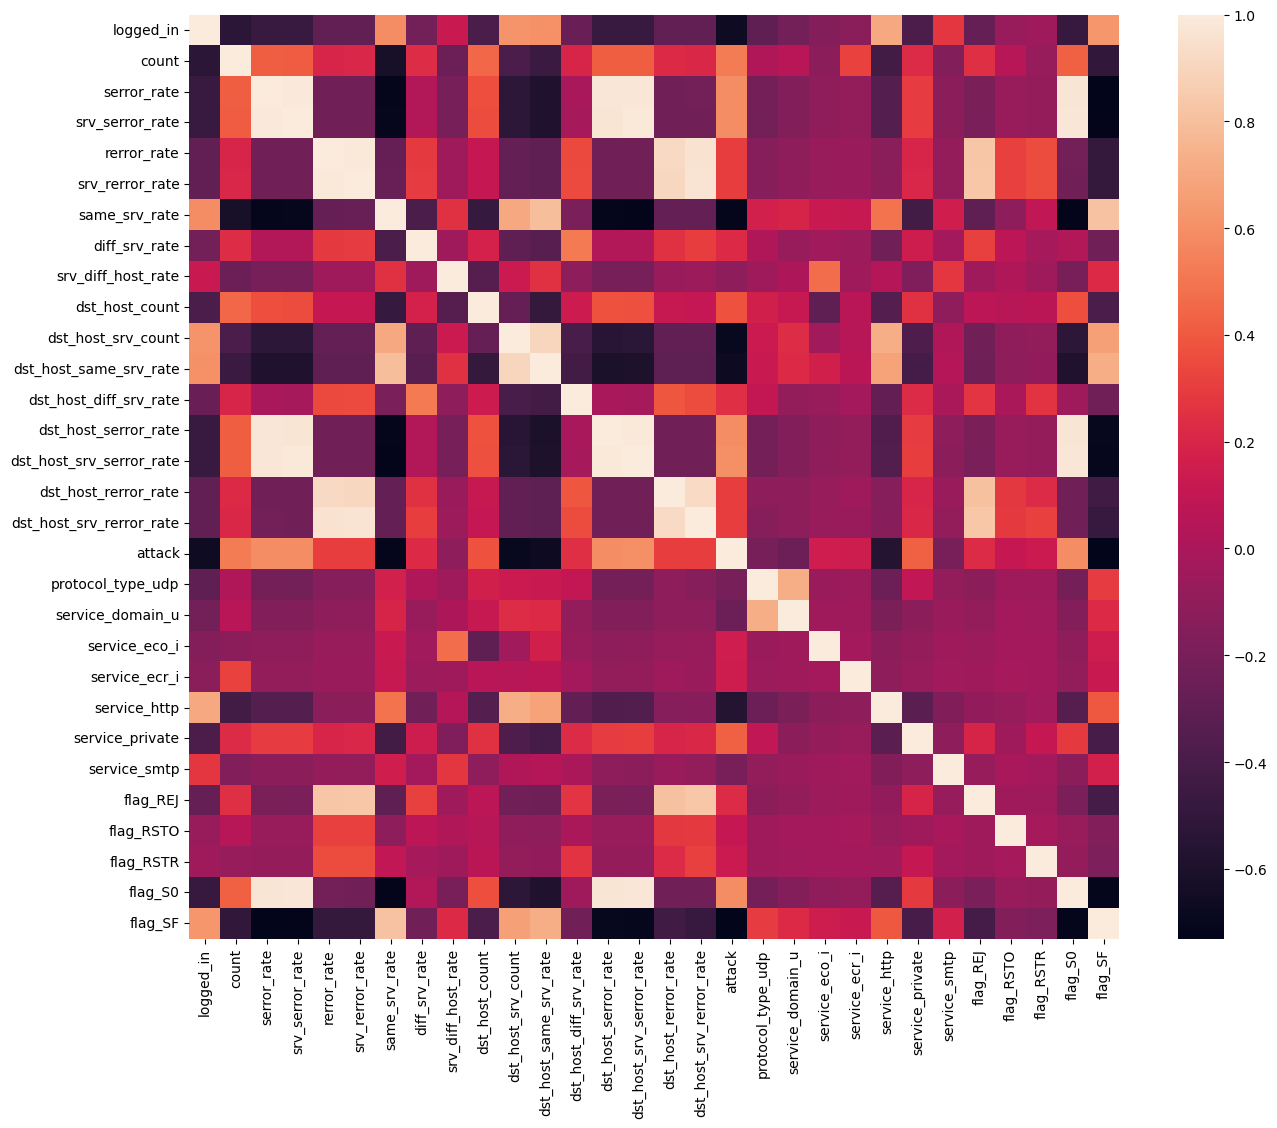

In [39]:
# checking the correlation using a heatmap graph
corr = combined_data.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [40]:
# dropping columns that are almost identical to the serror_rate column
combined_data.drop('srv_serror_rate',axis = 1,inplace = True)
combined_data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
combined_data.drop('dst_host_serror_rate',axis = 1, inplace=True)
combined_data.drop('flag_S0',axis = 1, inplace=True)

# dropping columns that are almost identical to the rerror_rate column
combined_data.drop('dst_host_rerror_rate',axis = 1, inplace=True)
combined_data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
combined_data.drop('srv_rerror_rate',axis = 1,inplace = True)


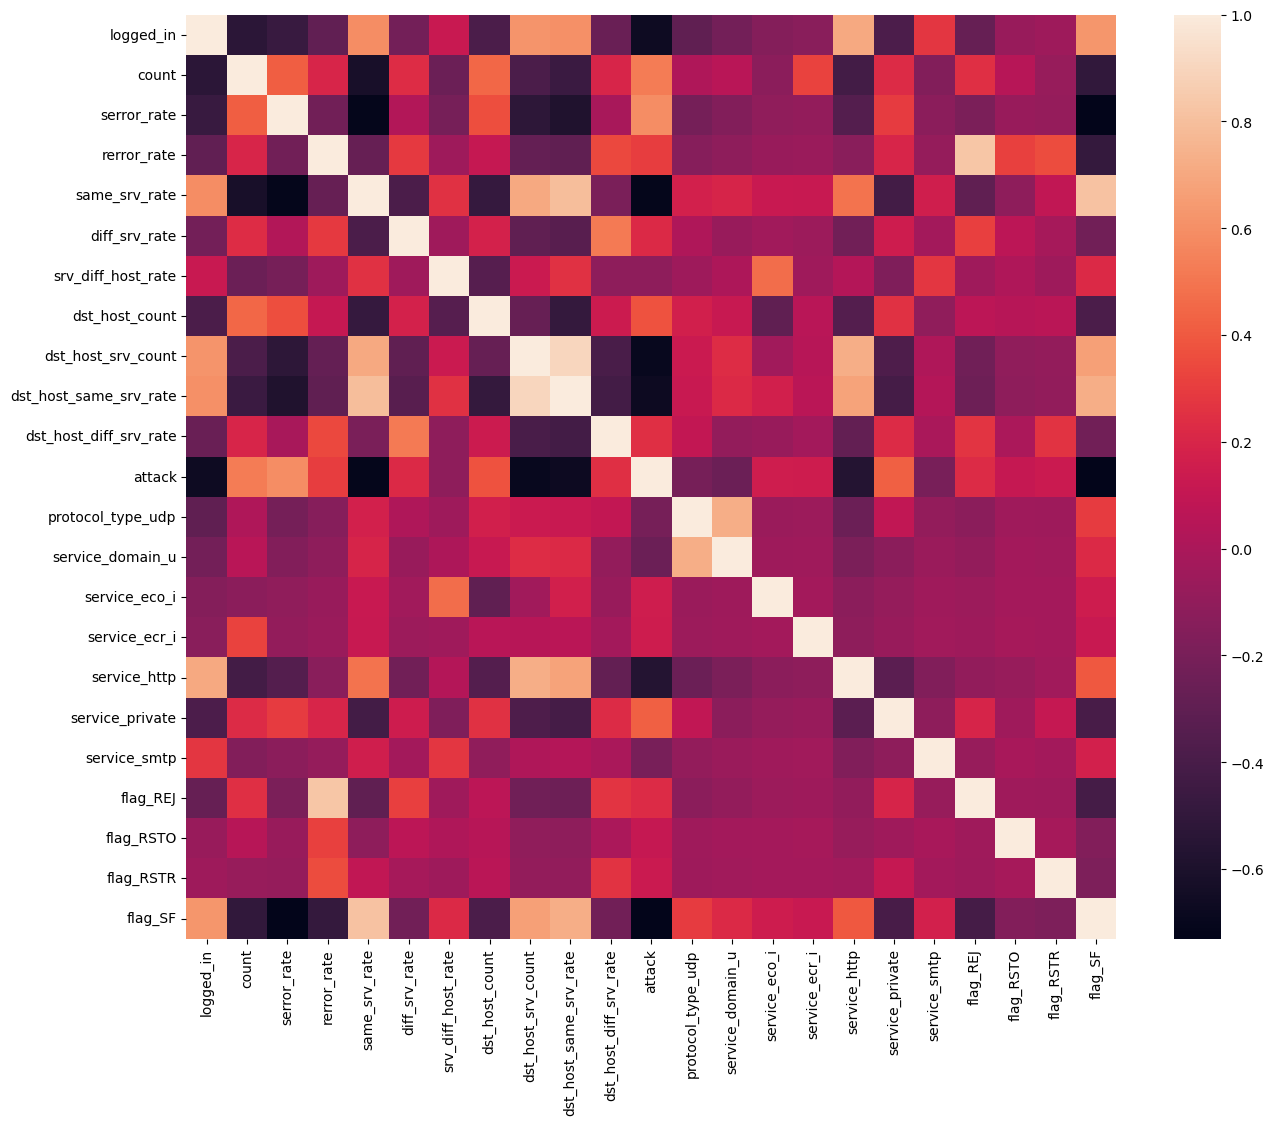

In [41]:
# checking the correlation using a heatmap graph
corr = combined_data.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [42]:
combined_data.shape

(147907, 23)

- We have 23 columns including the target.

In [43]:
combined_data.describe()

,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,...,service_domain_u,service_eco_i,service_ecr_i,service_http,service_private,service_smtp,flag_REJ,flag_RSTO,flag_RSTR,flag_SF
count,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,...,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000,147907.000000
mean,0.404301,83.052405,0.257602,0.137655,0.672709,0.067839,0.097680,183.850467,119.388372,0.533852,...,0.066805,0.032094,0.024360,0.325664,0.178991,0.055758,0.101212,0.015746,0.020837,0.604393
std,0.490758,116.527072,0.432281,0.339064,0.436607,0.194731,0.259152,98.504144,111.204986,0.447955,...,0.249686,0.176252,0.154164,0.468624,0.383346,0.229455,0.301611,0.124493,0.142840,0.488982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.100000,0.000000,0.000000,86.000000,11.000000,0.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,141.000000,0.930000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


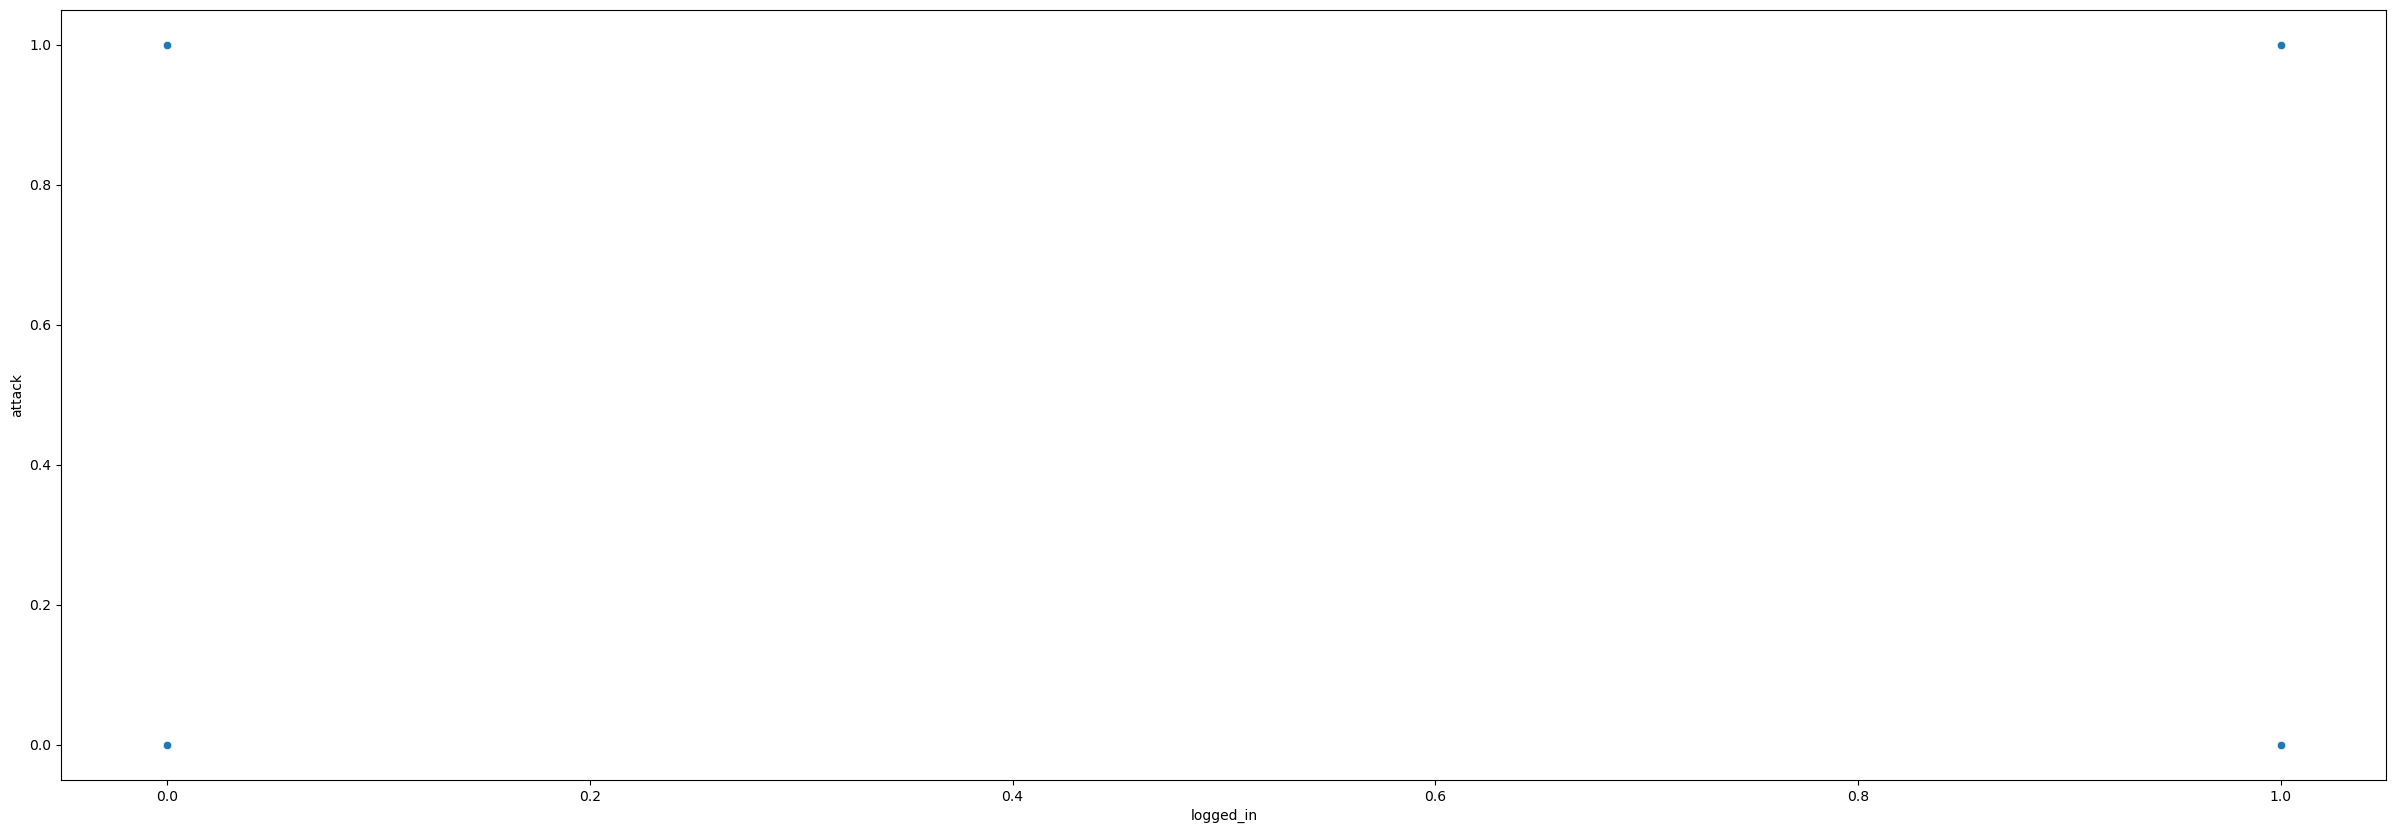

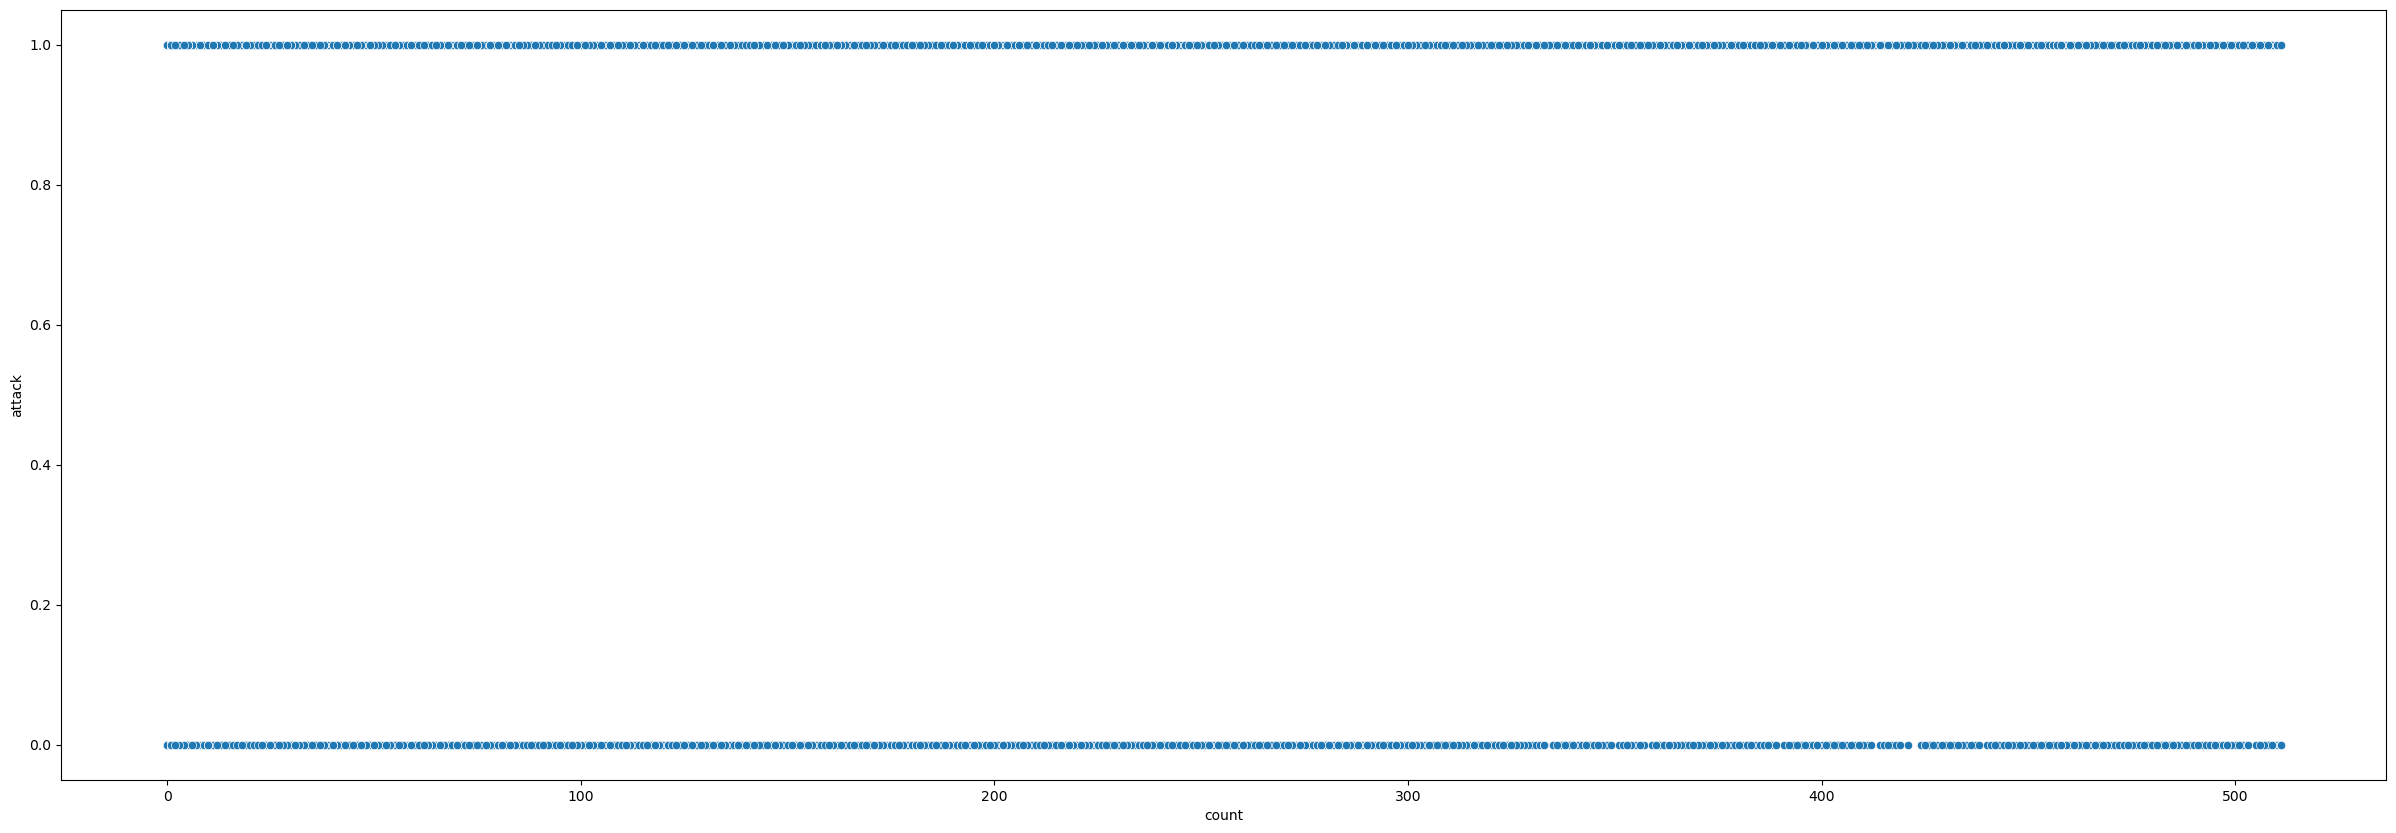

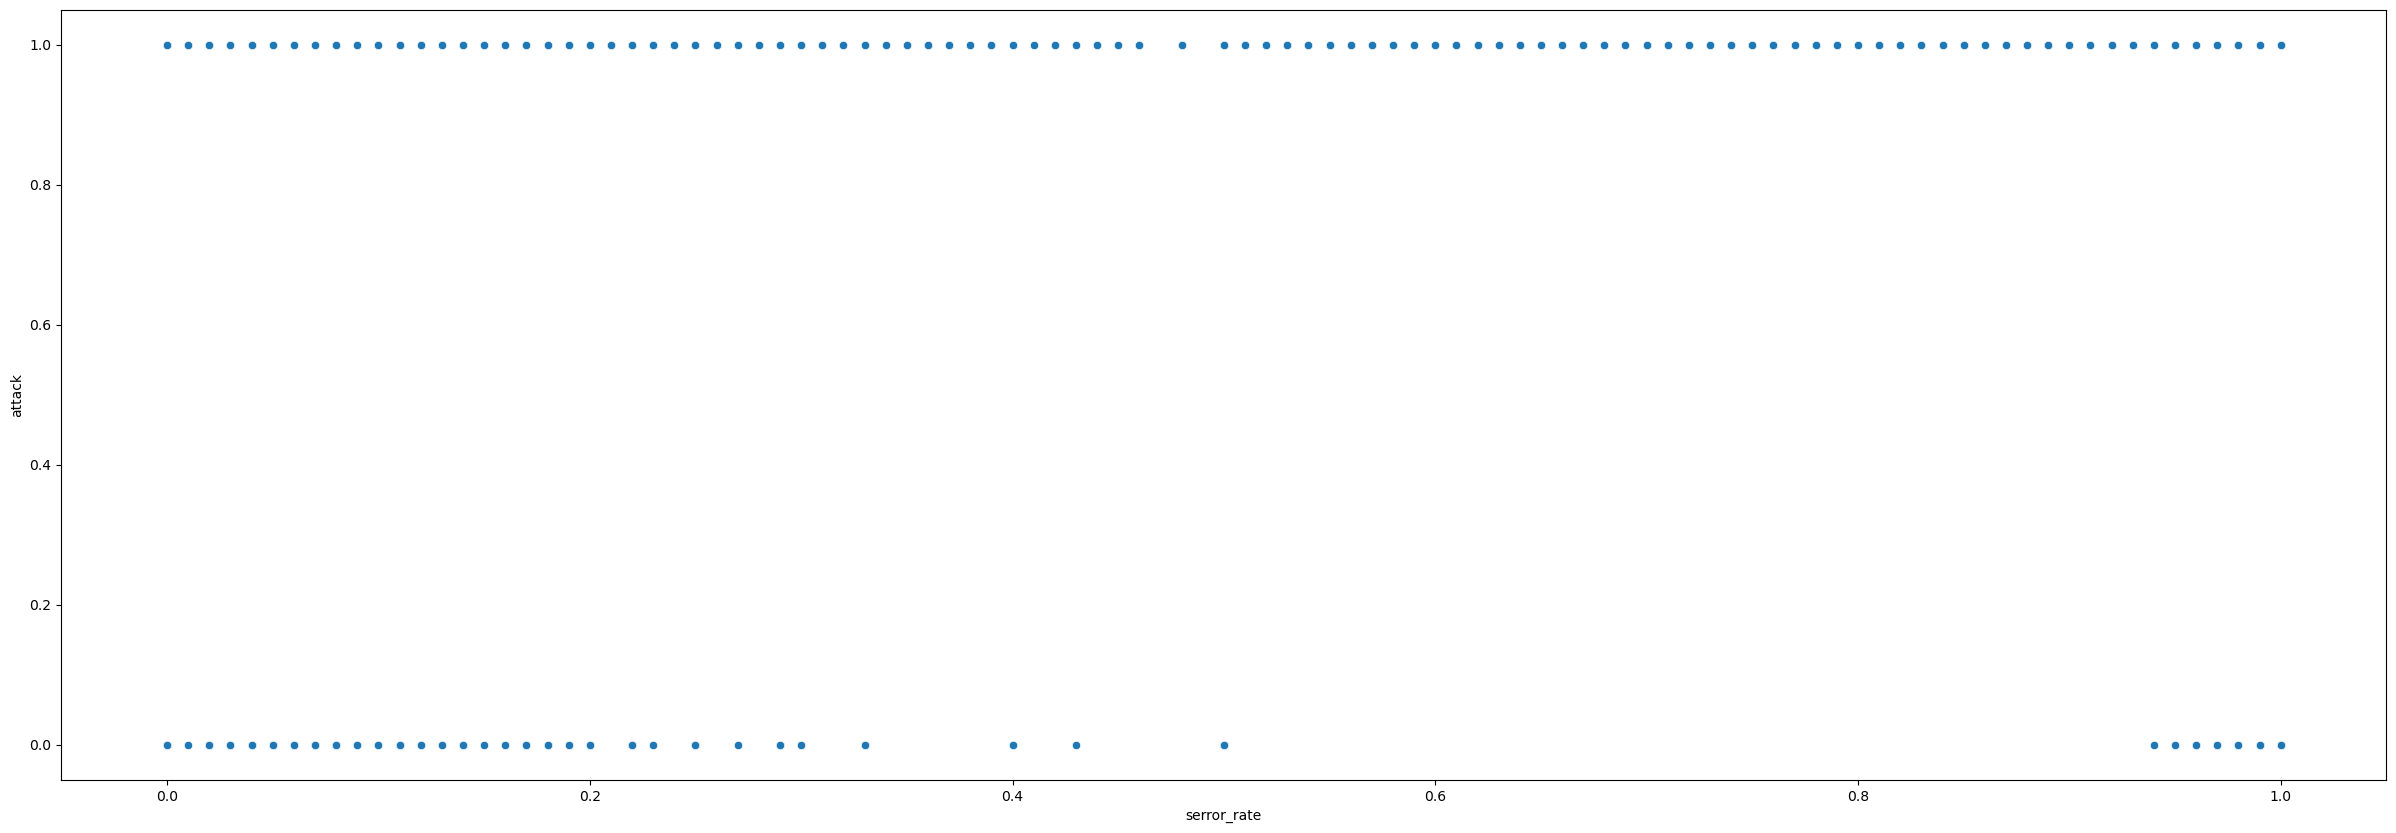

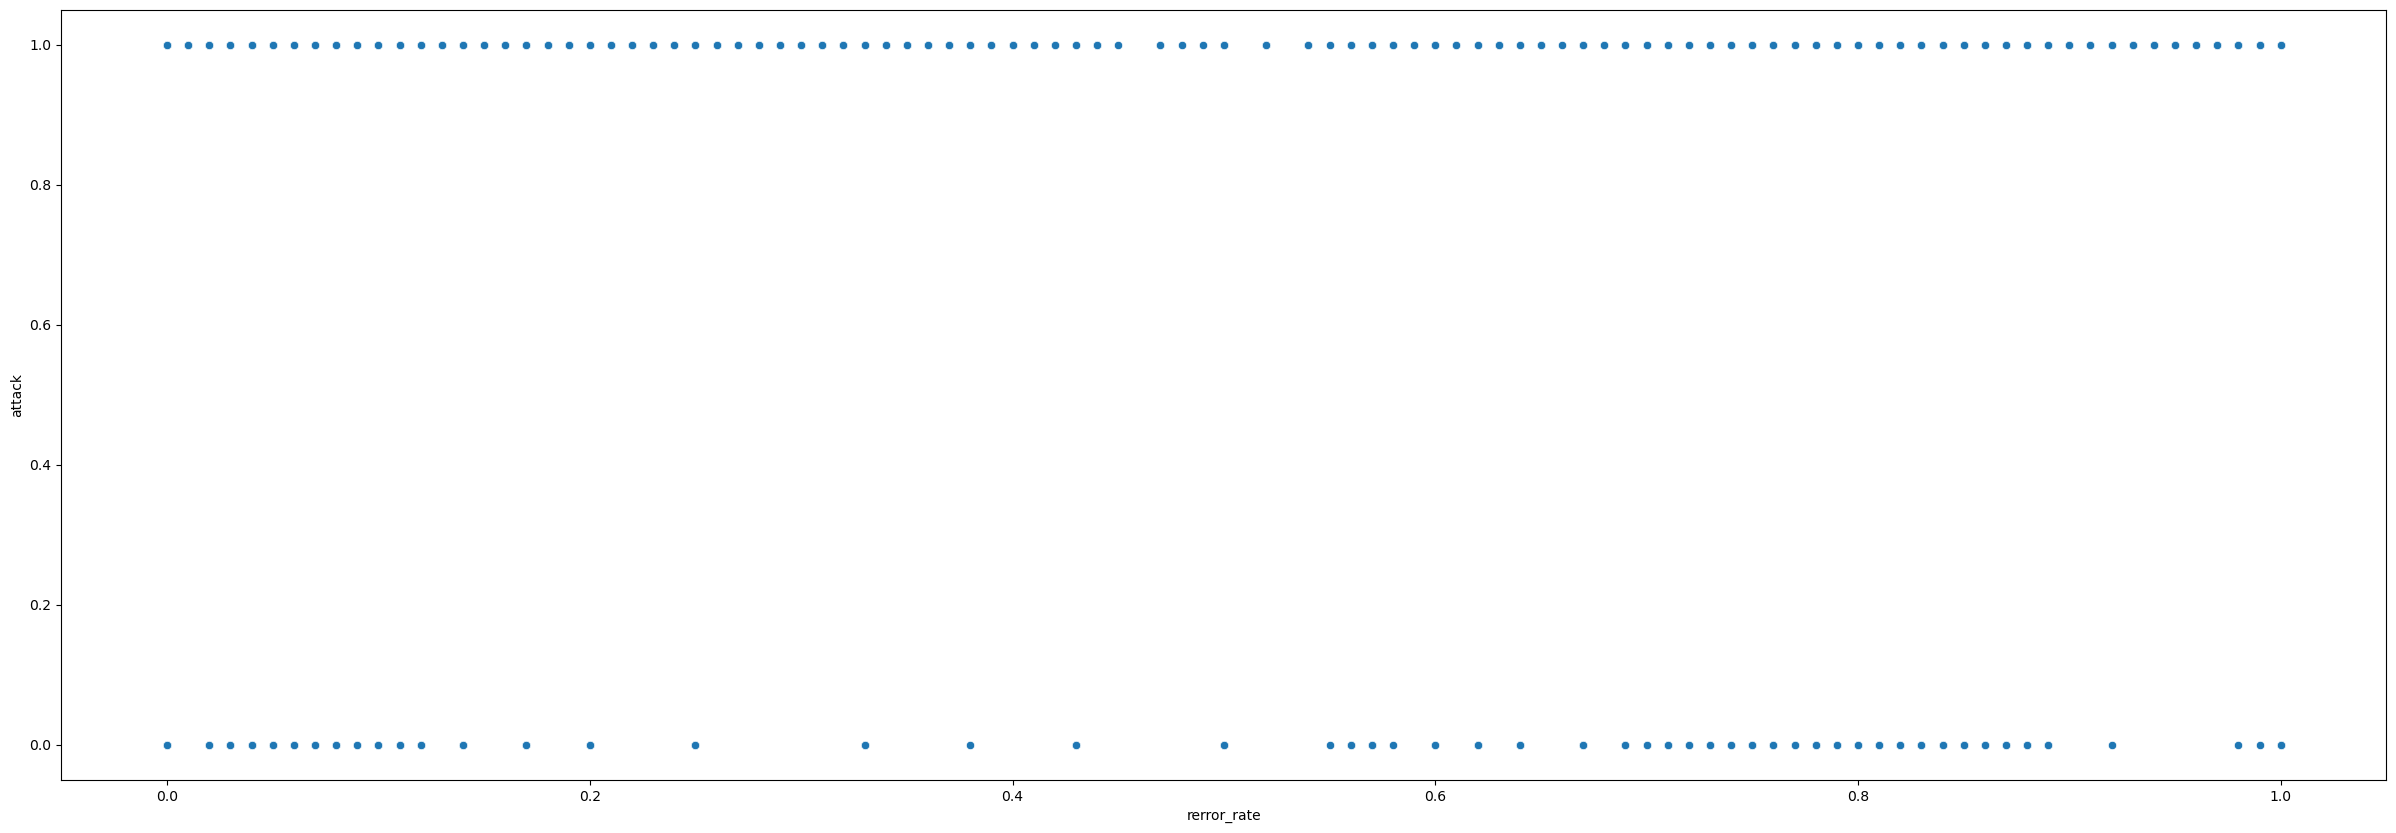

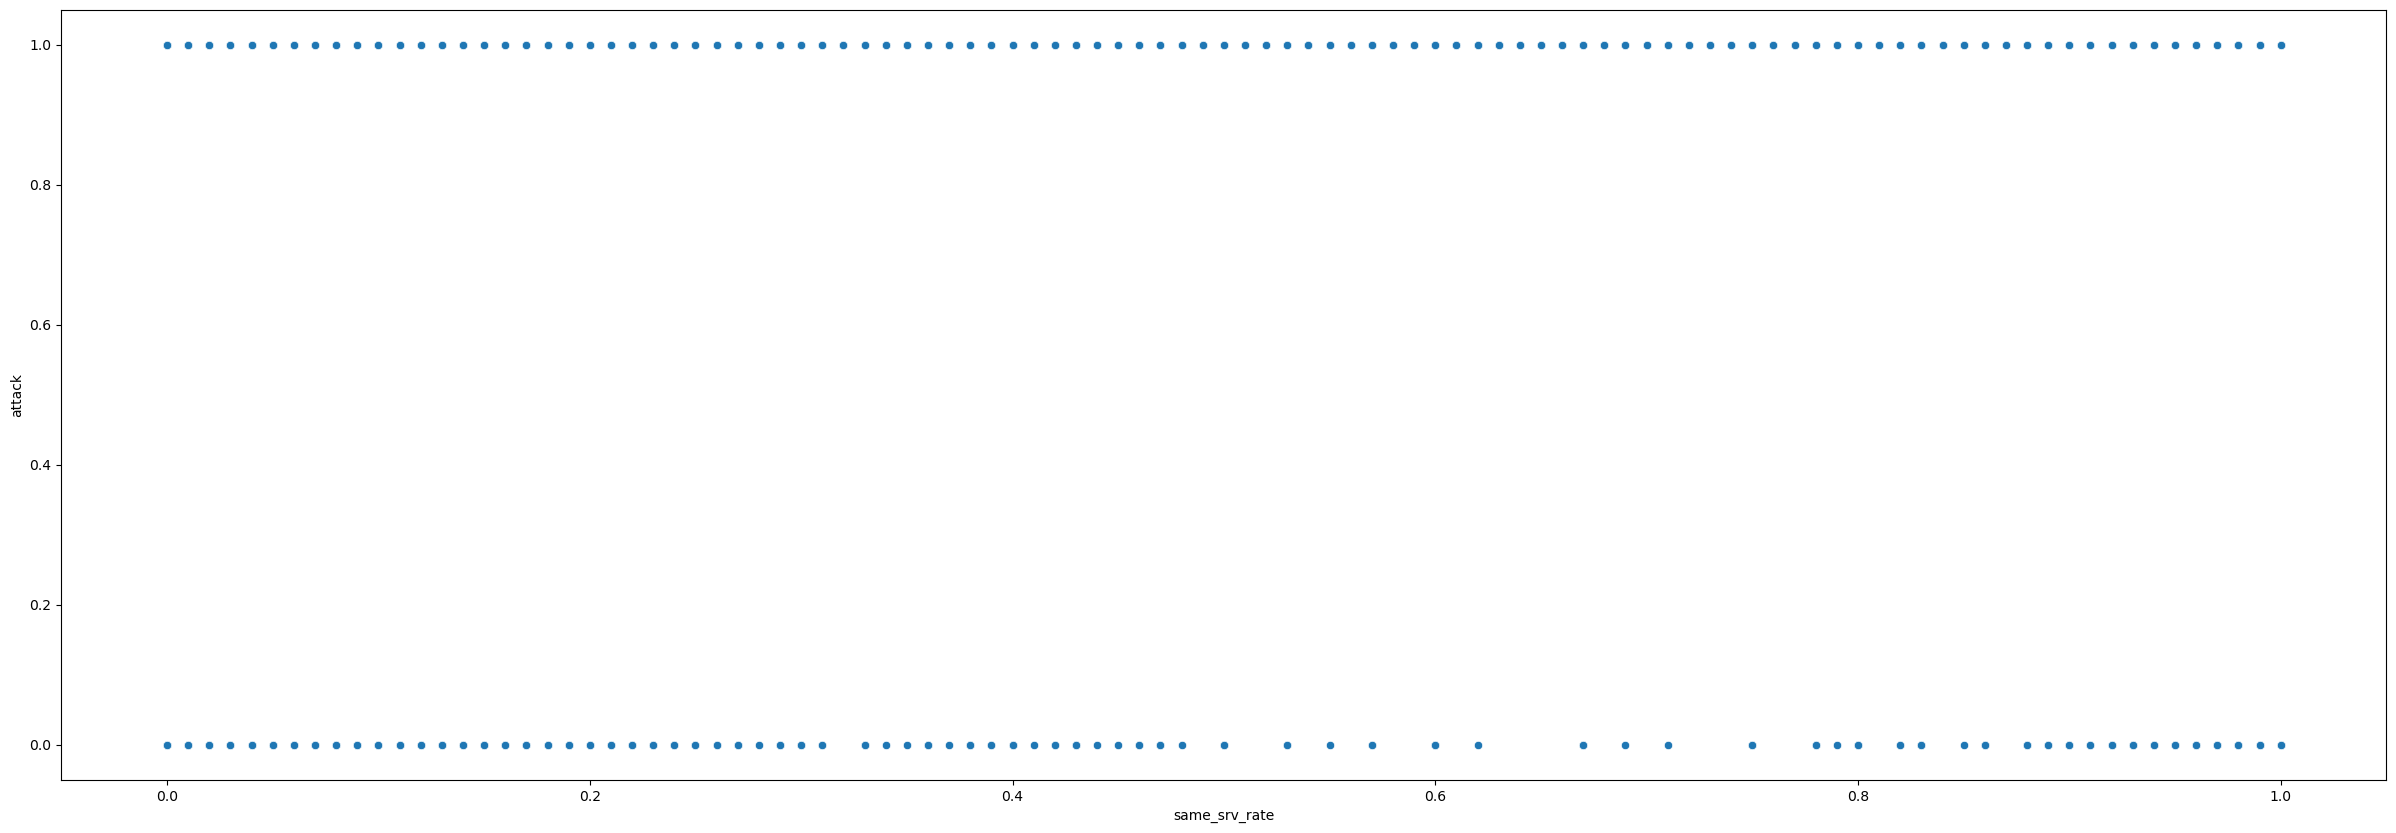

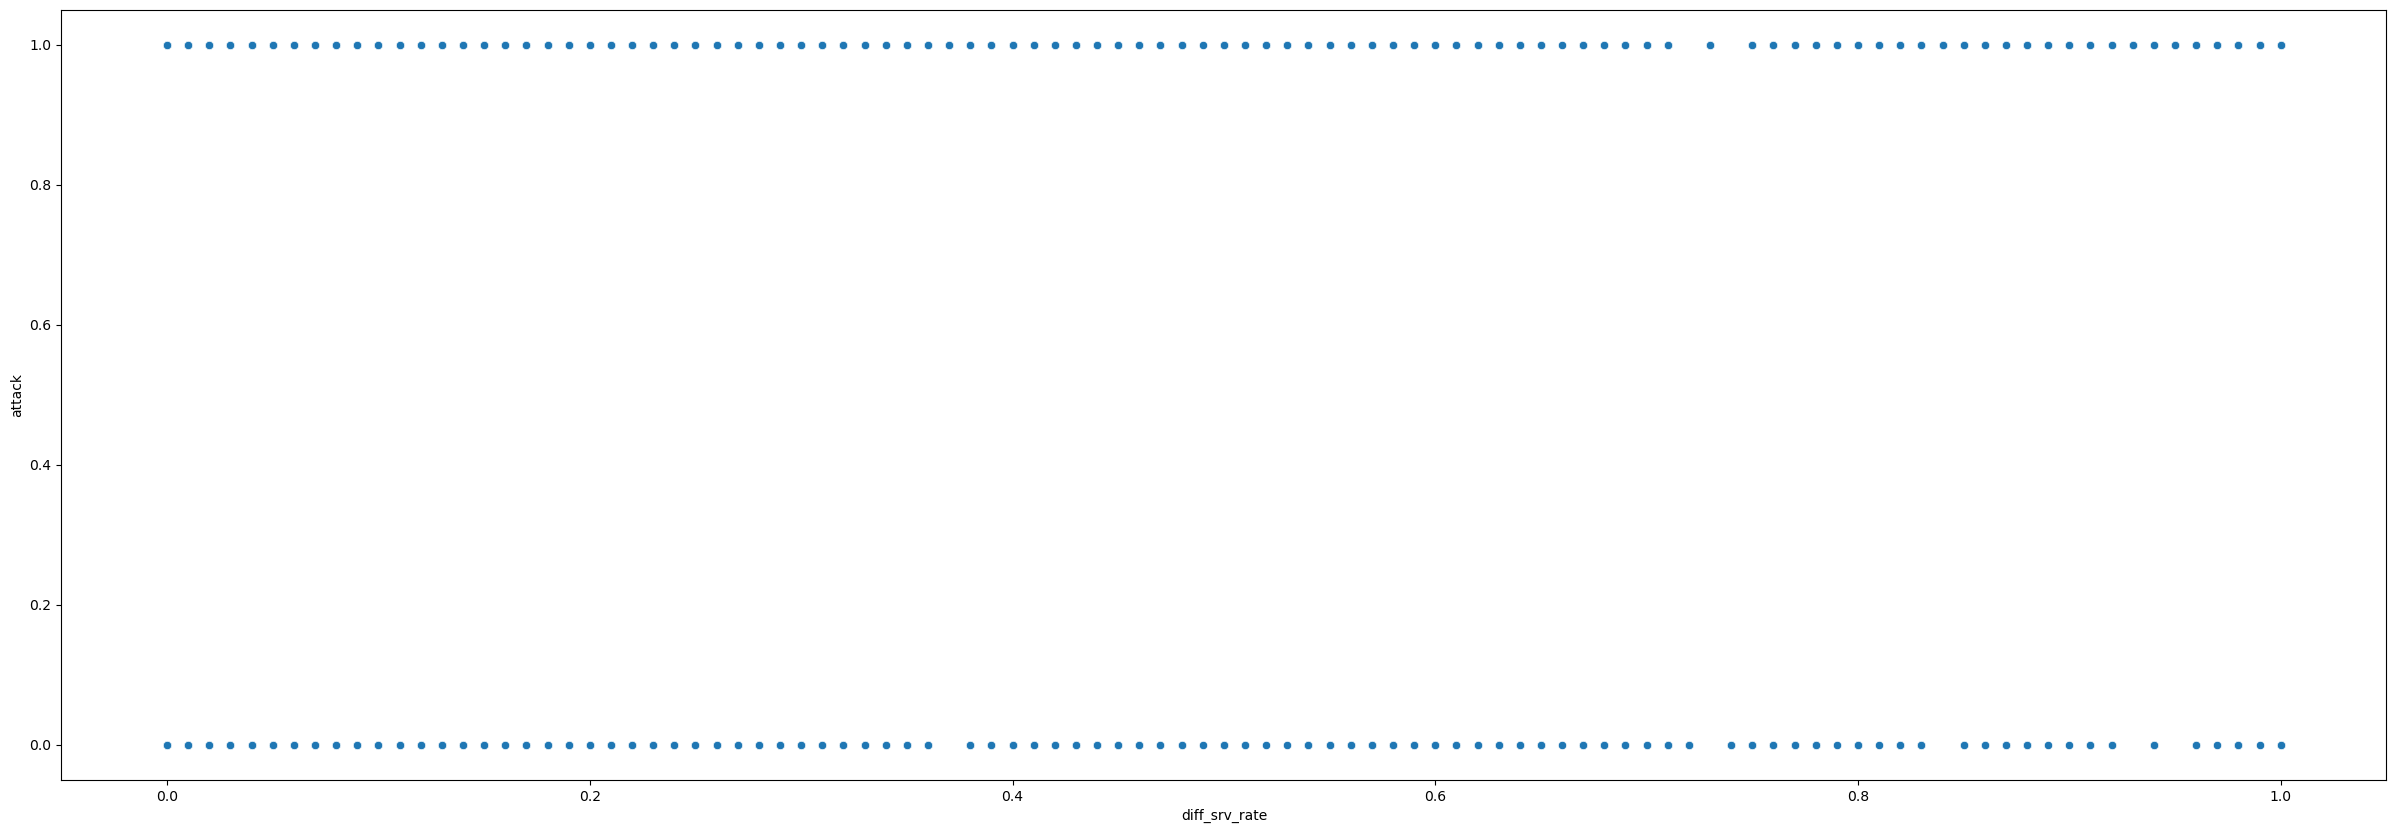

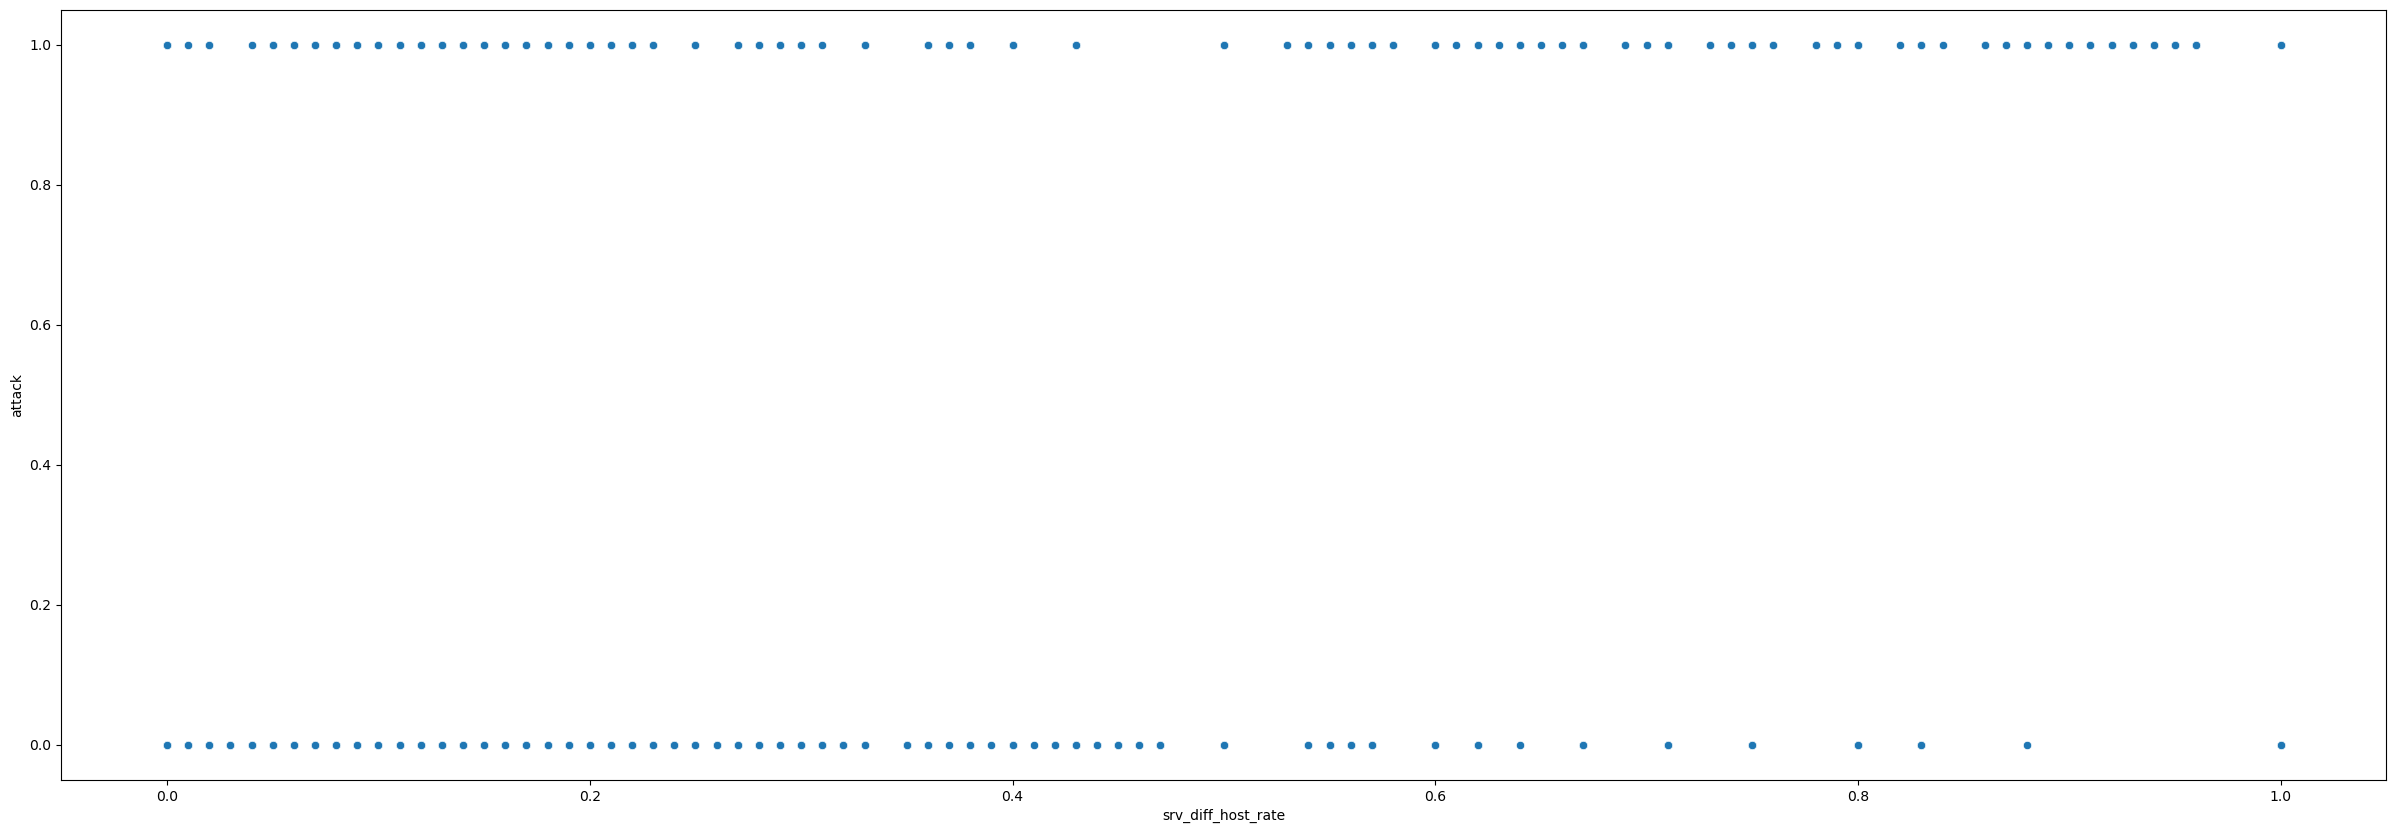

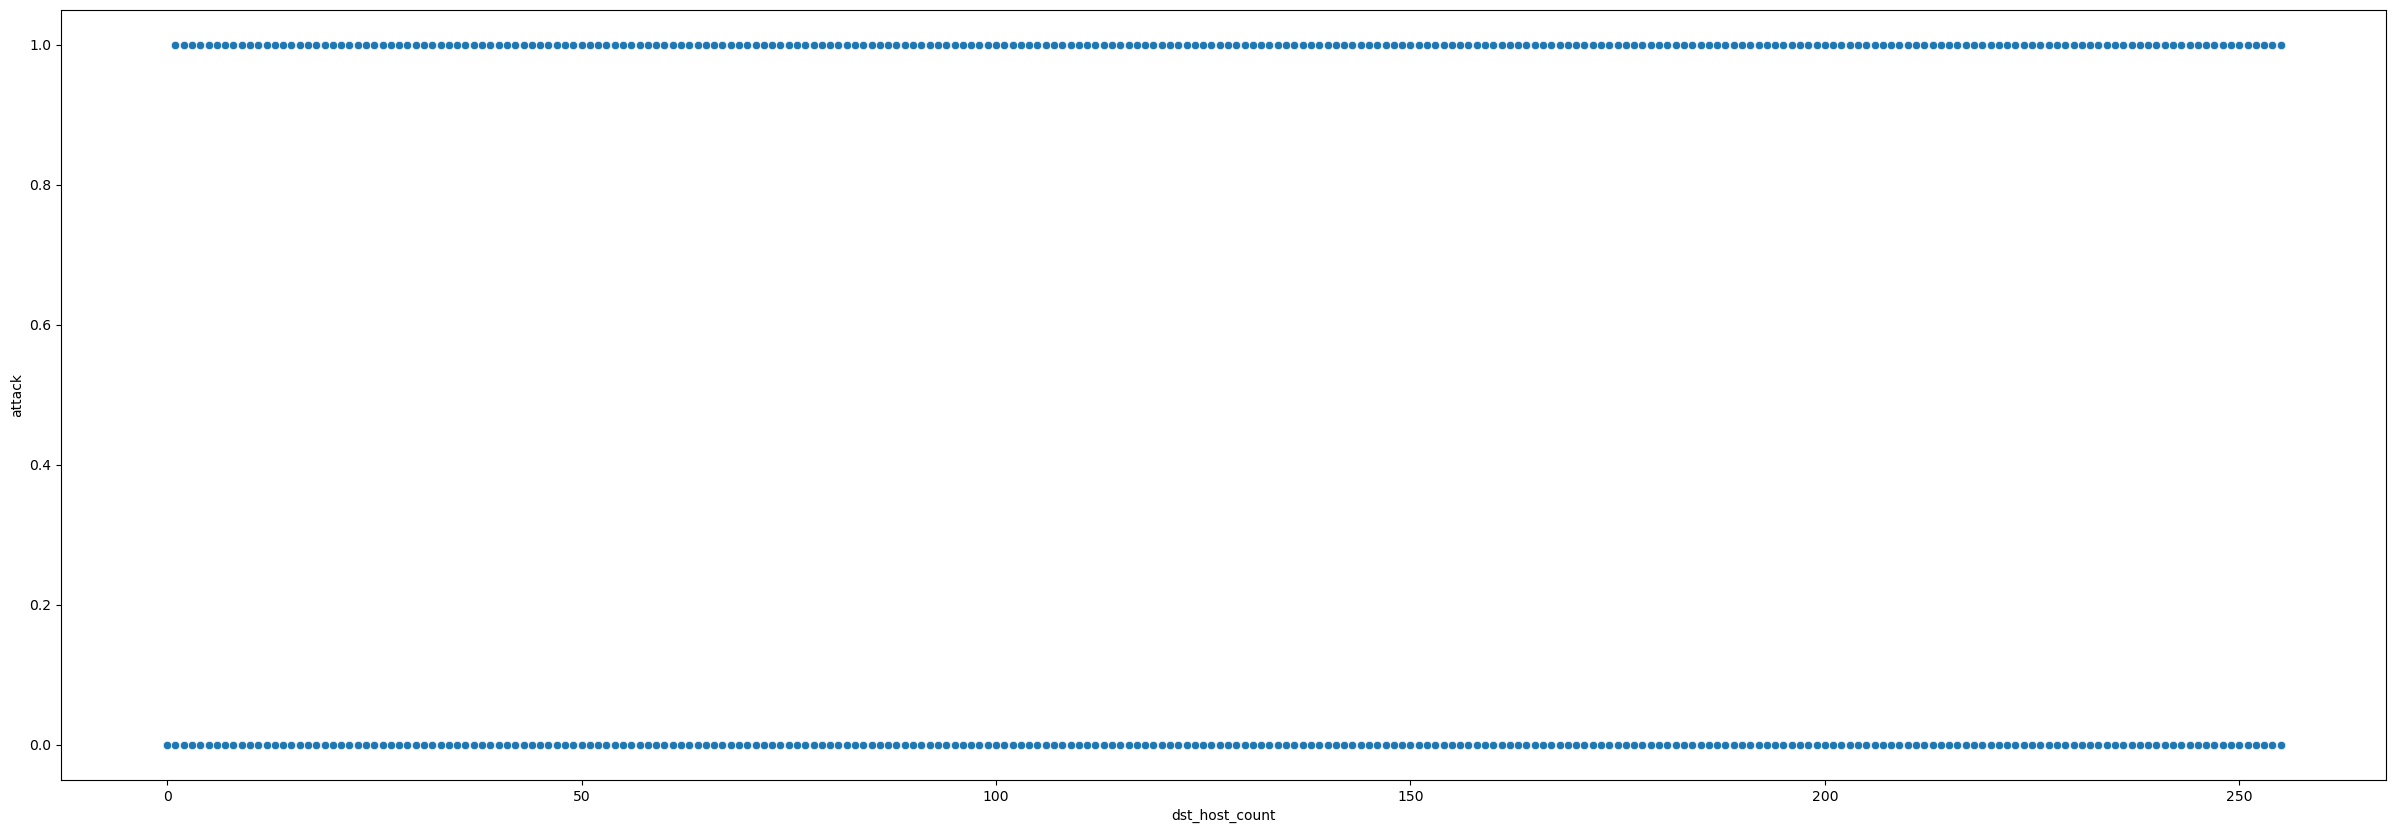

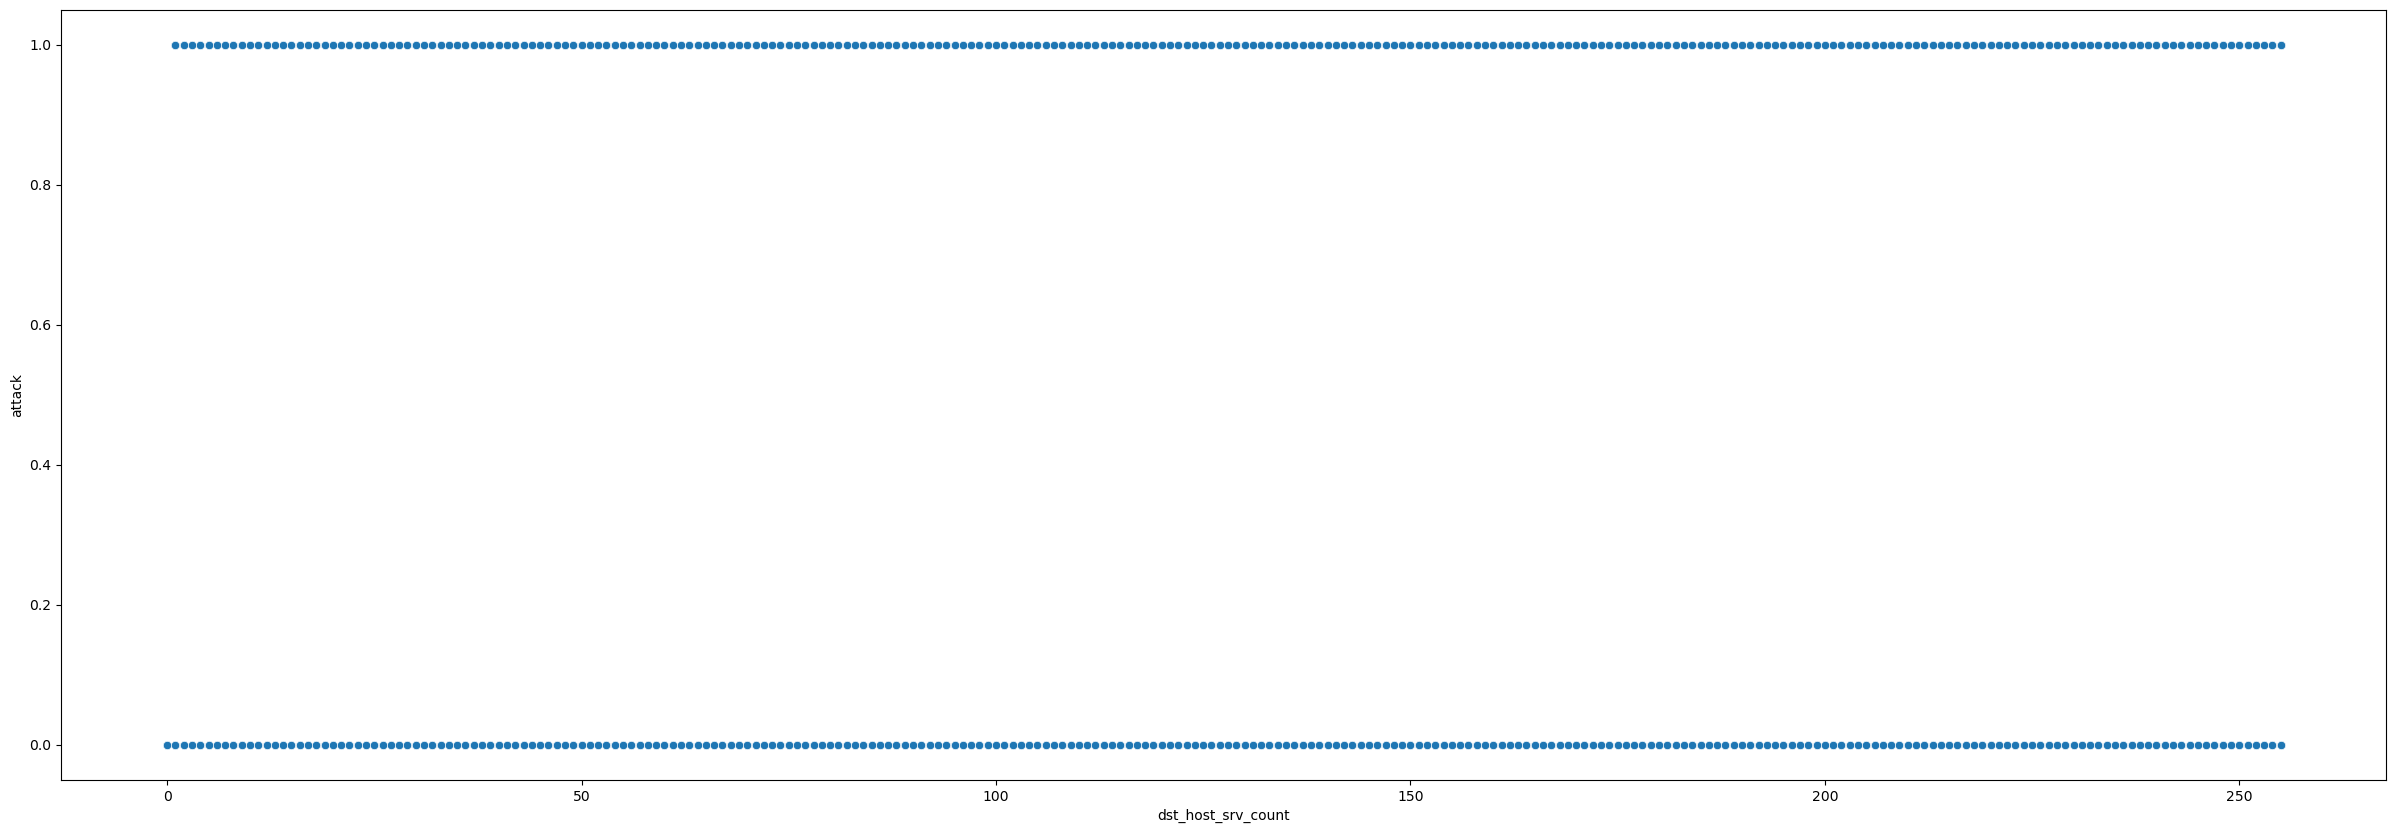

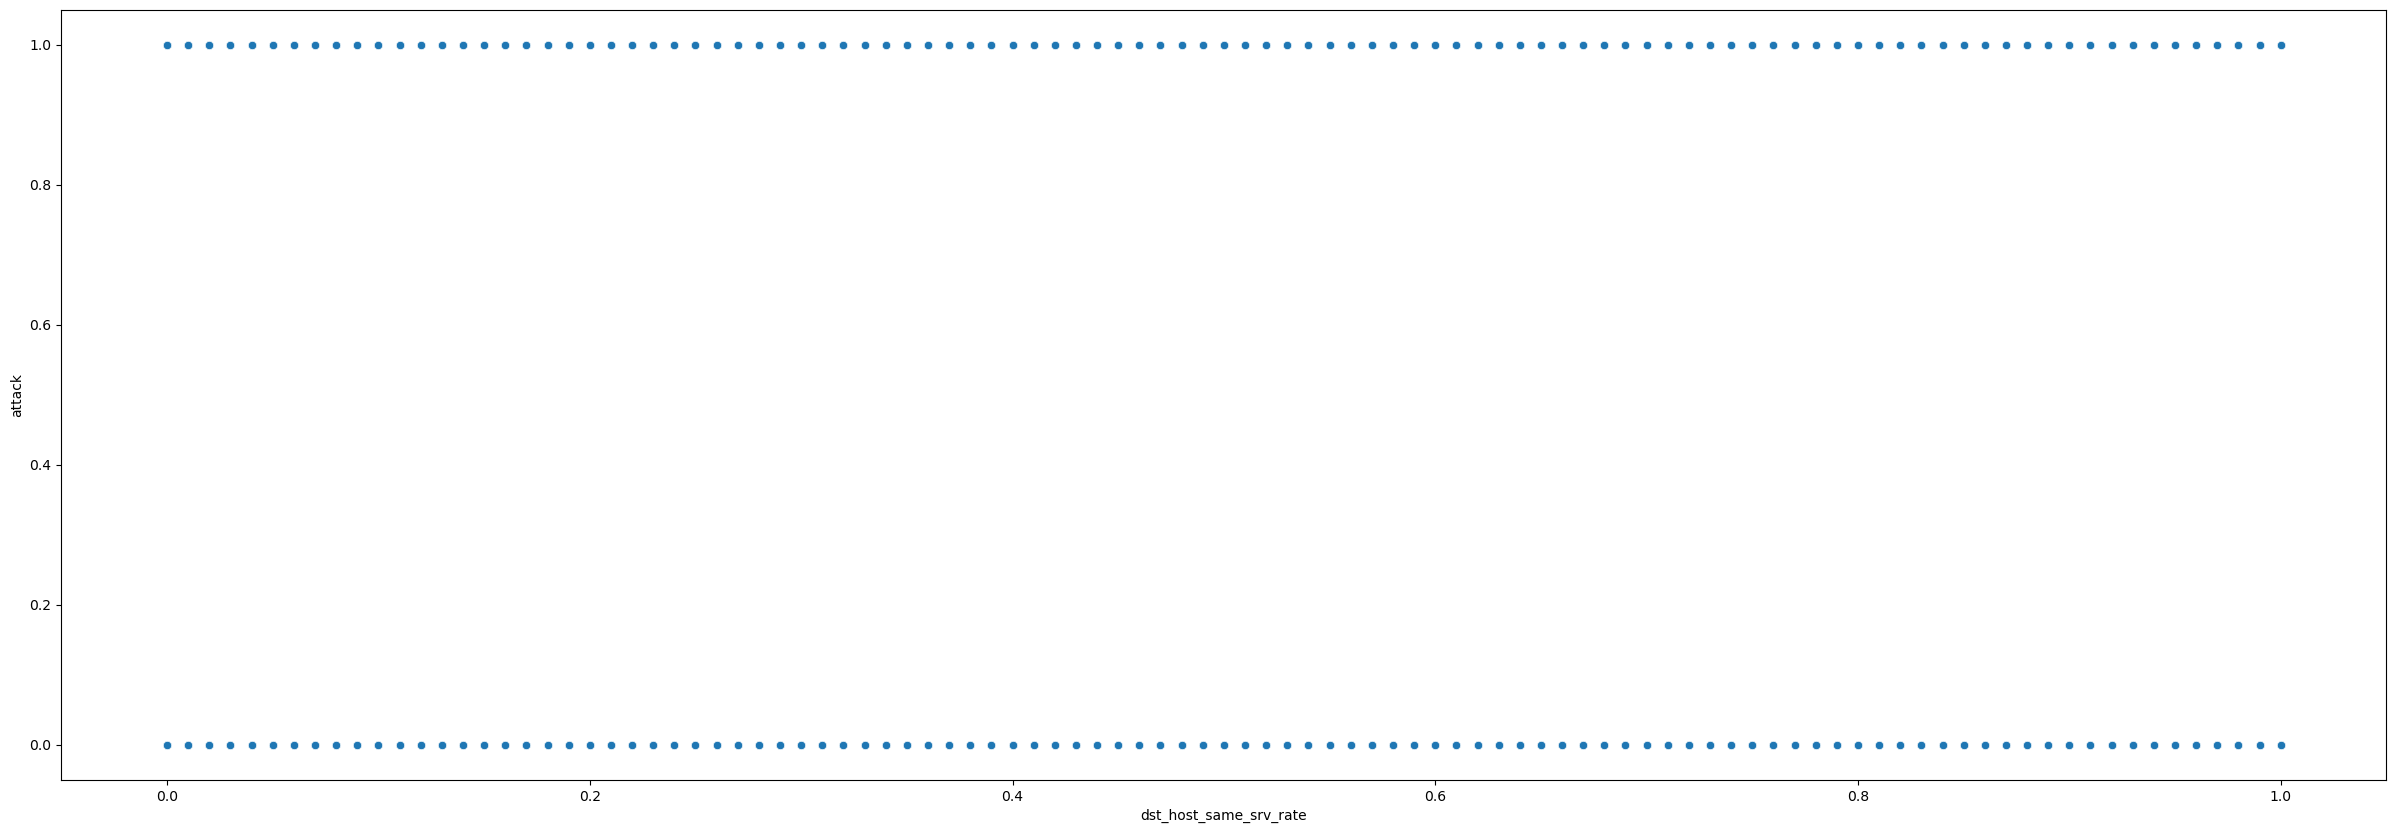

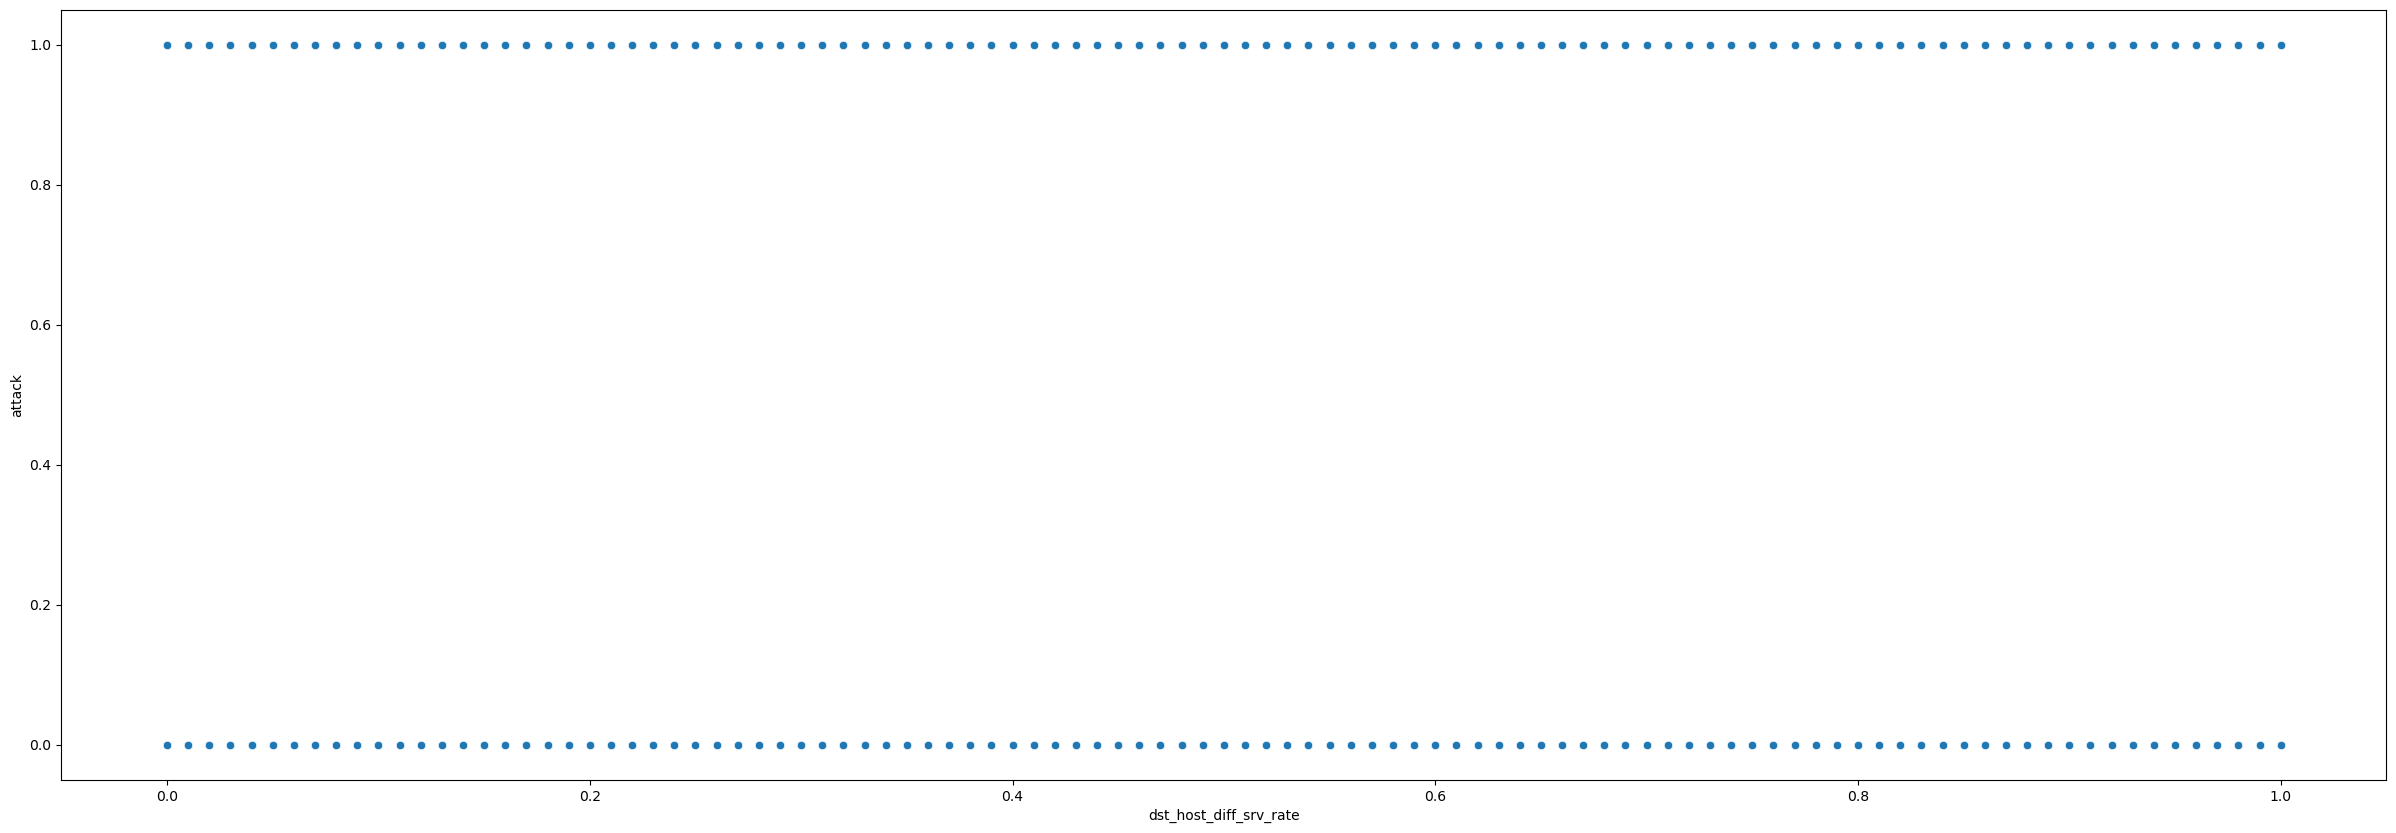

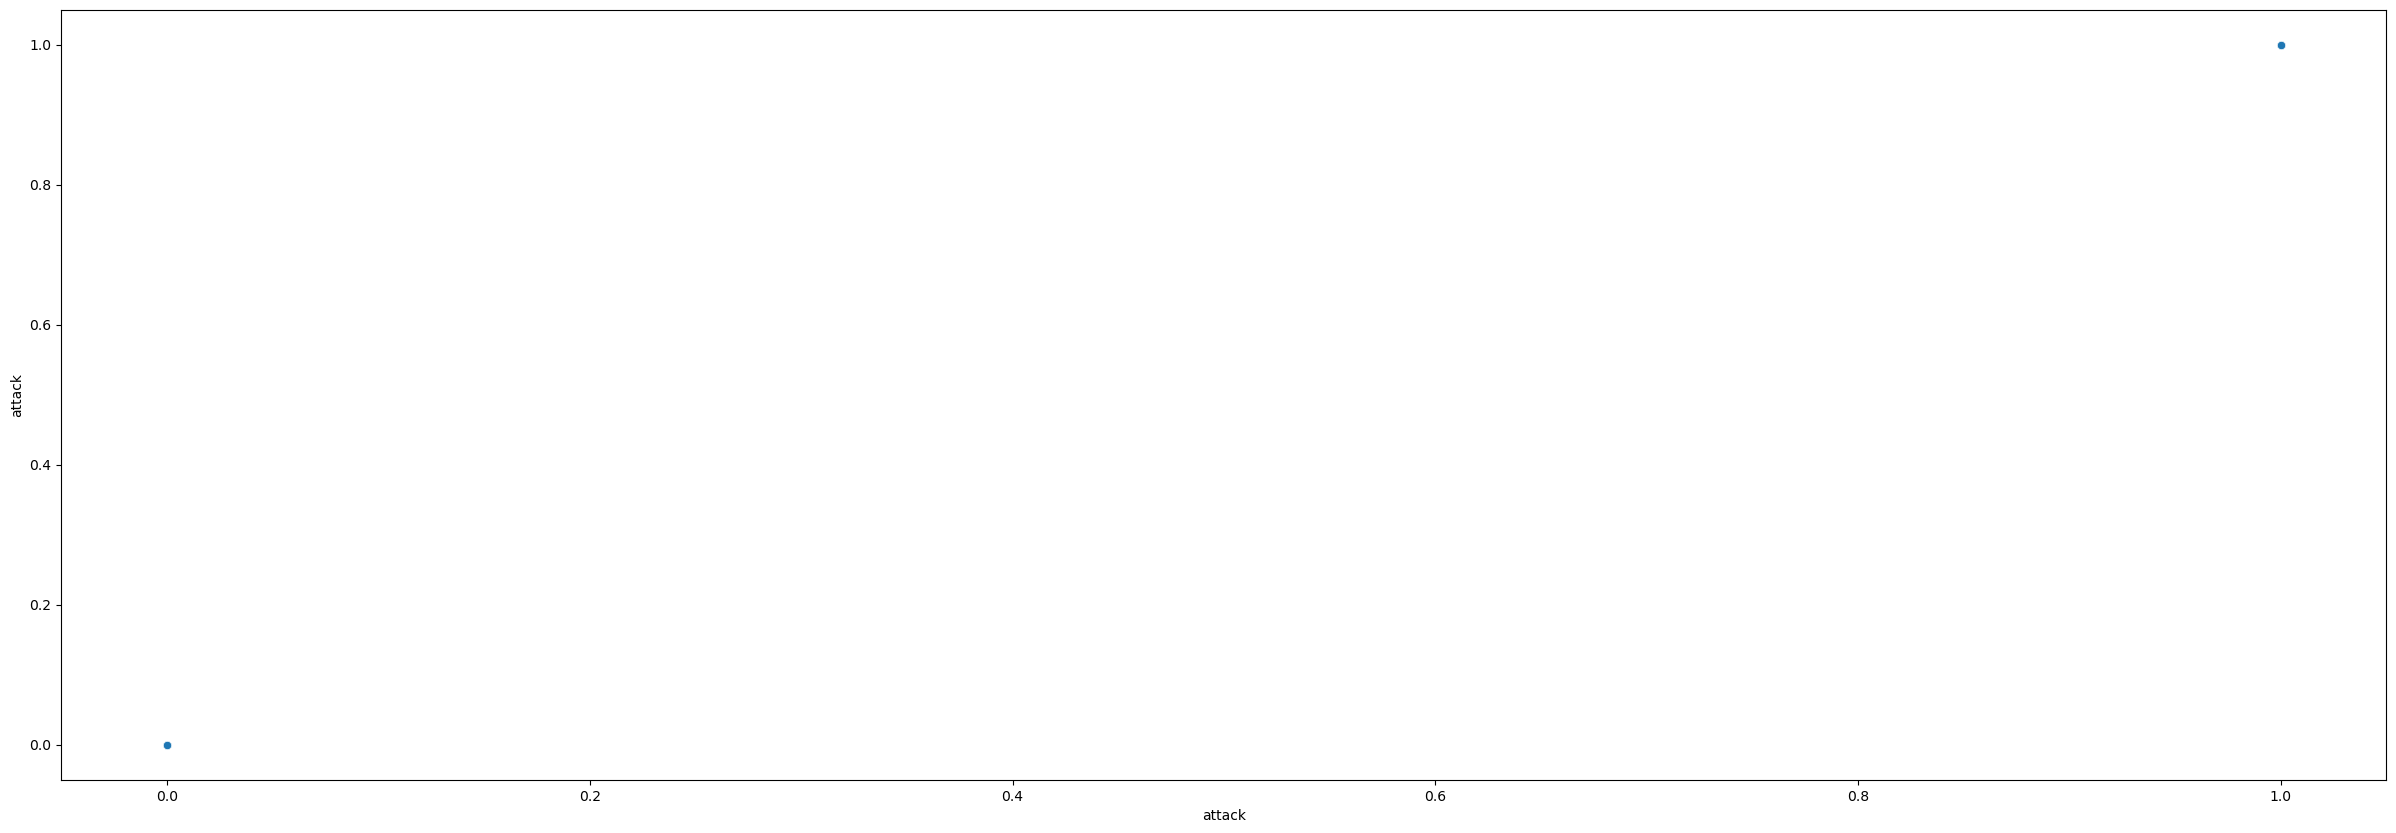

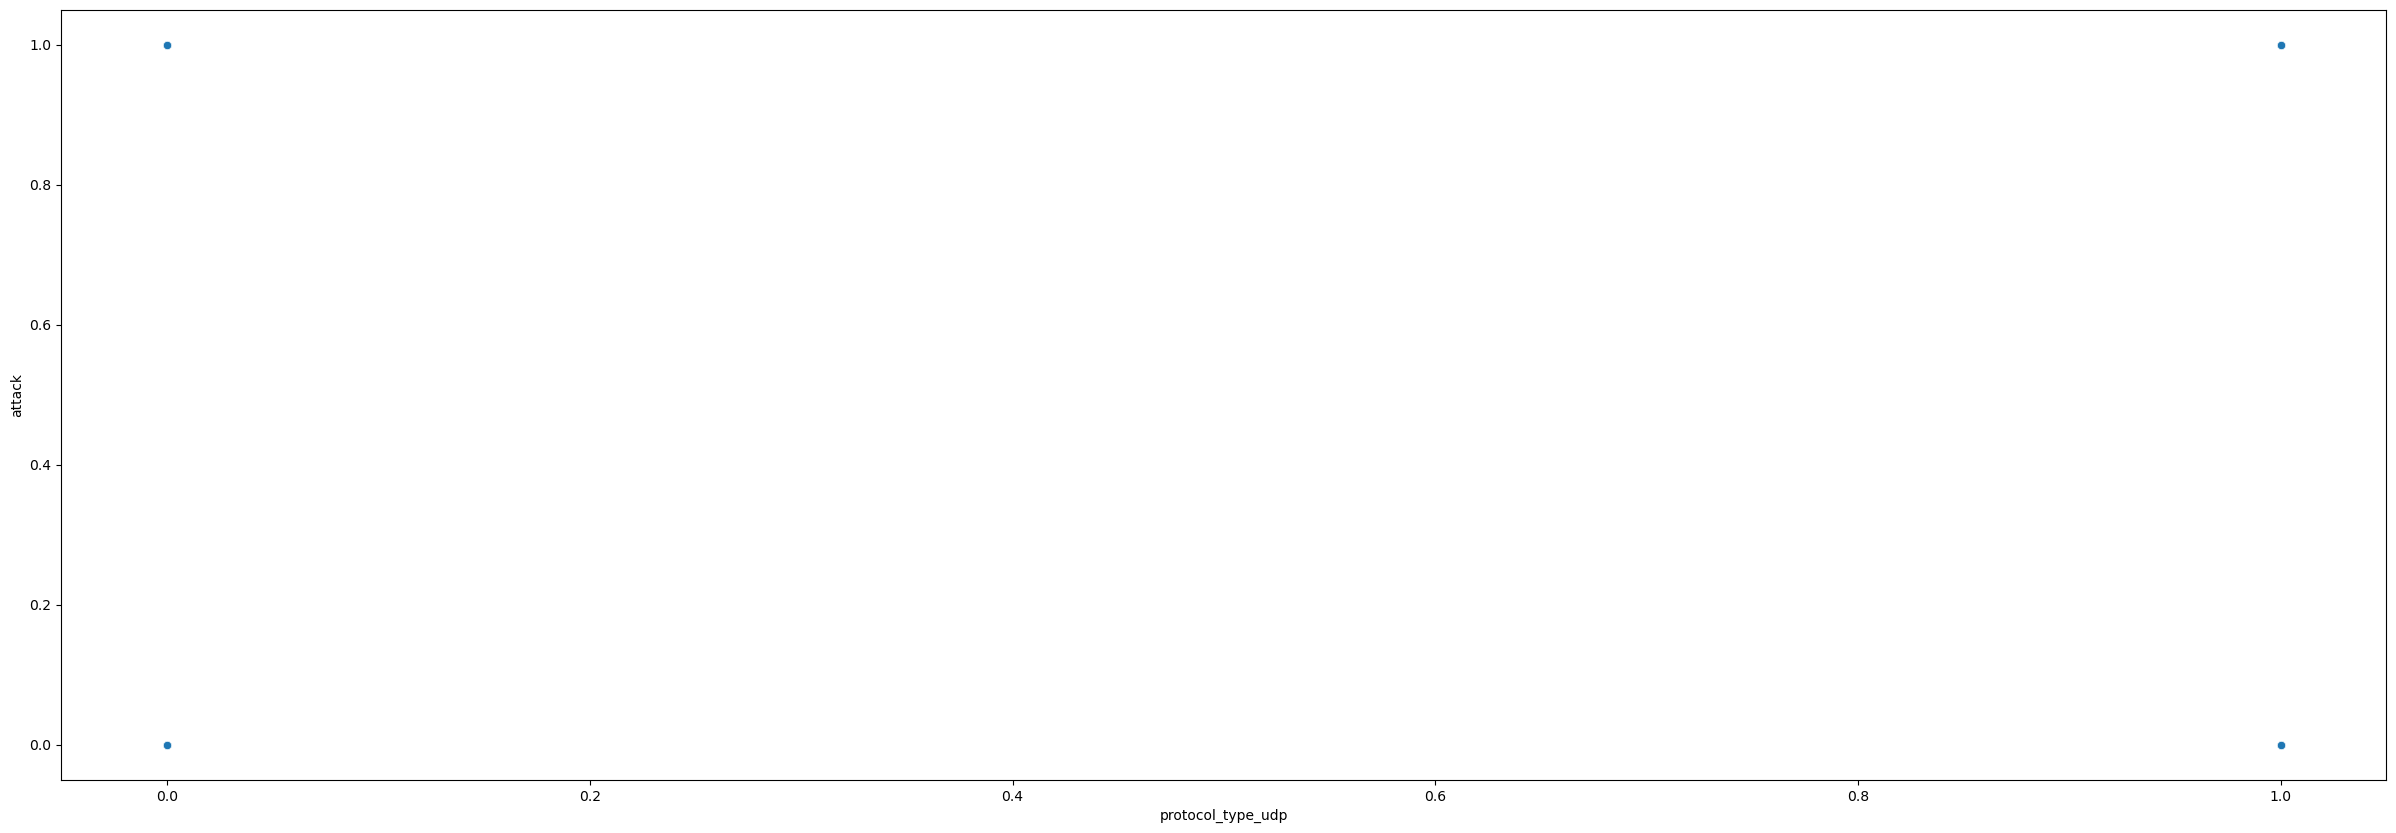

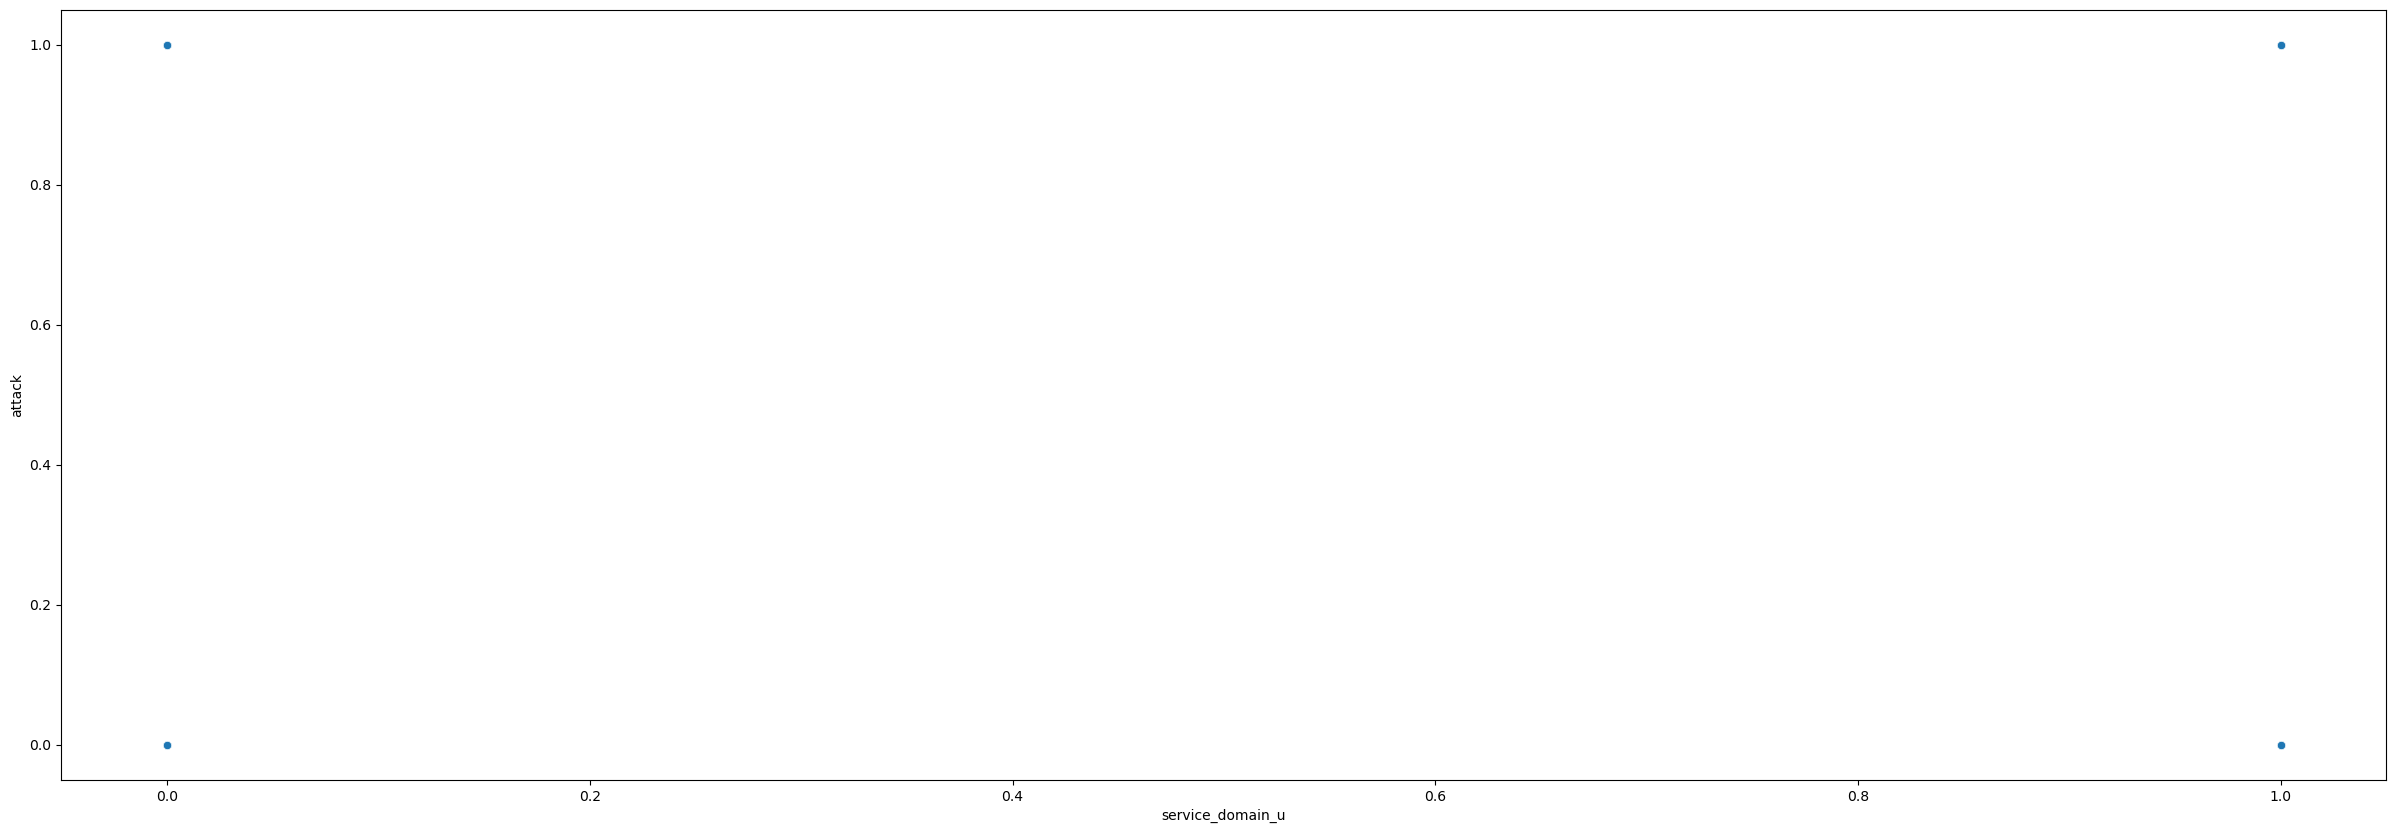

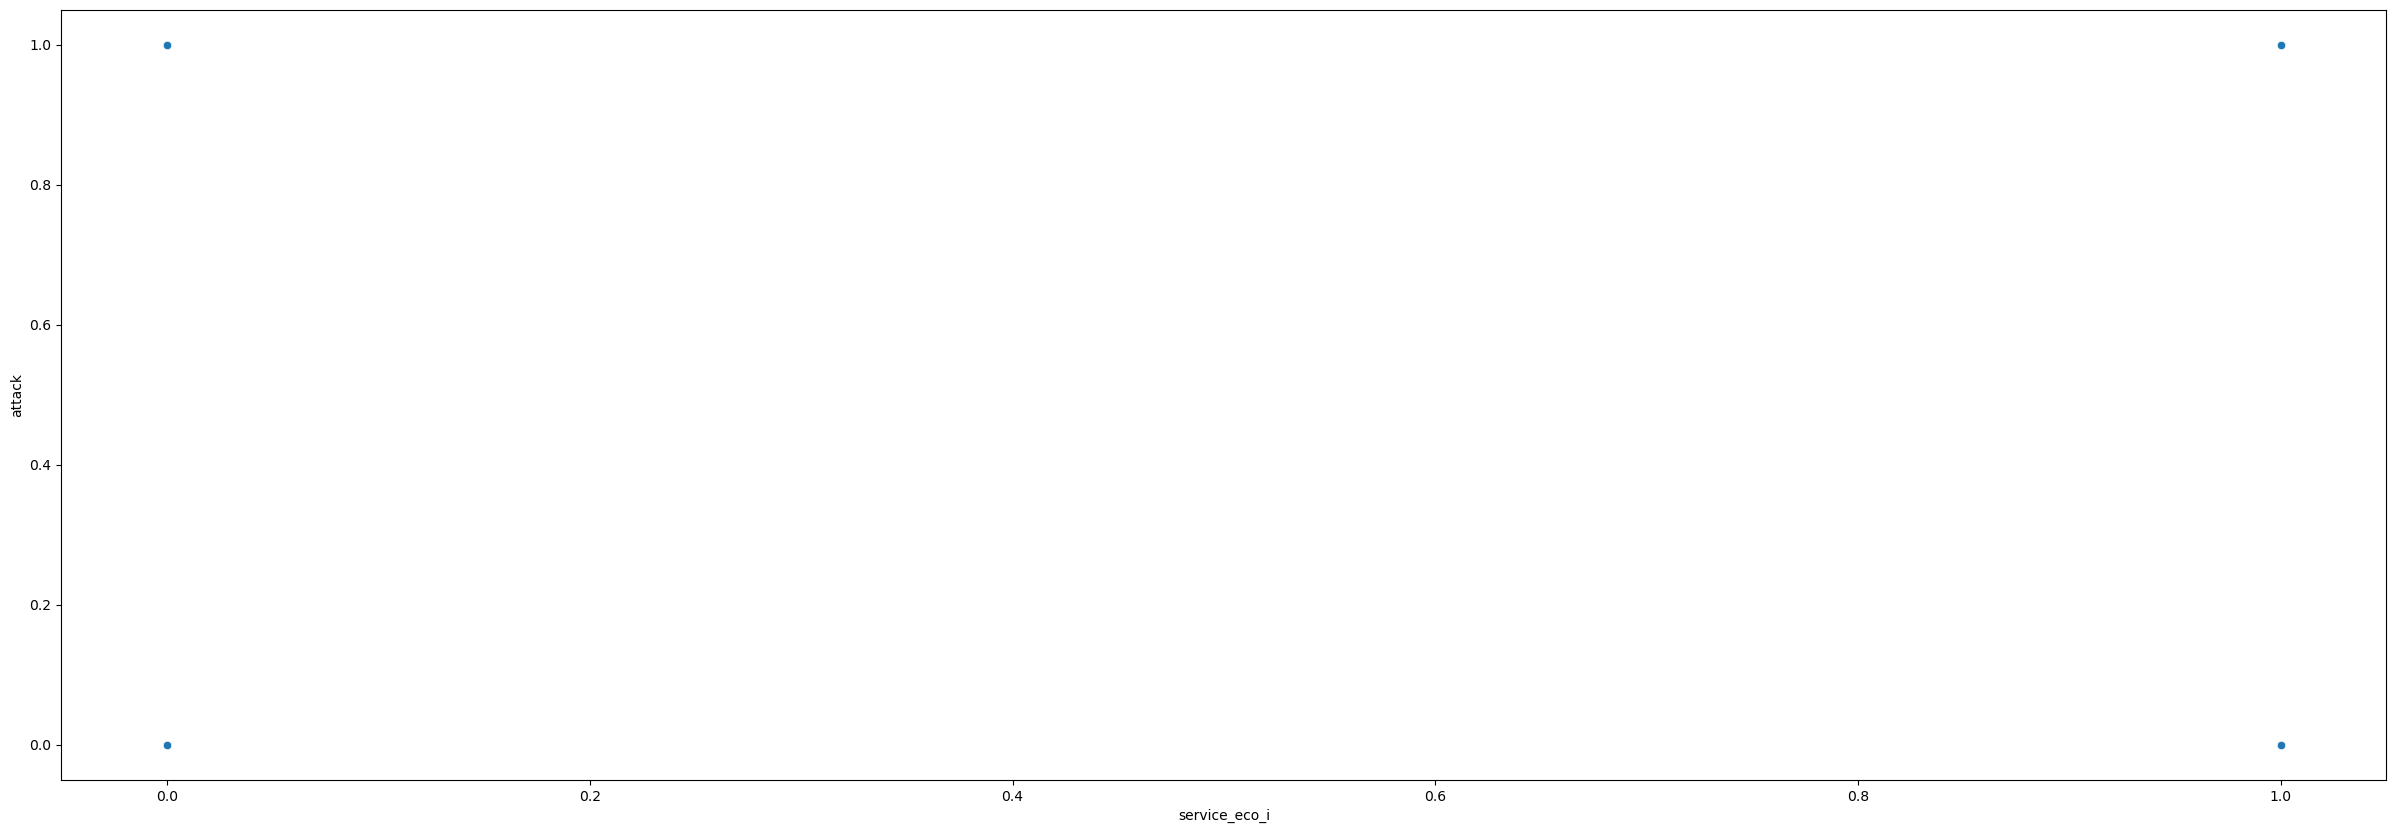

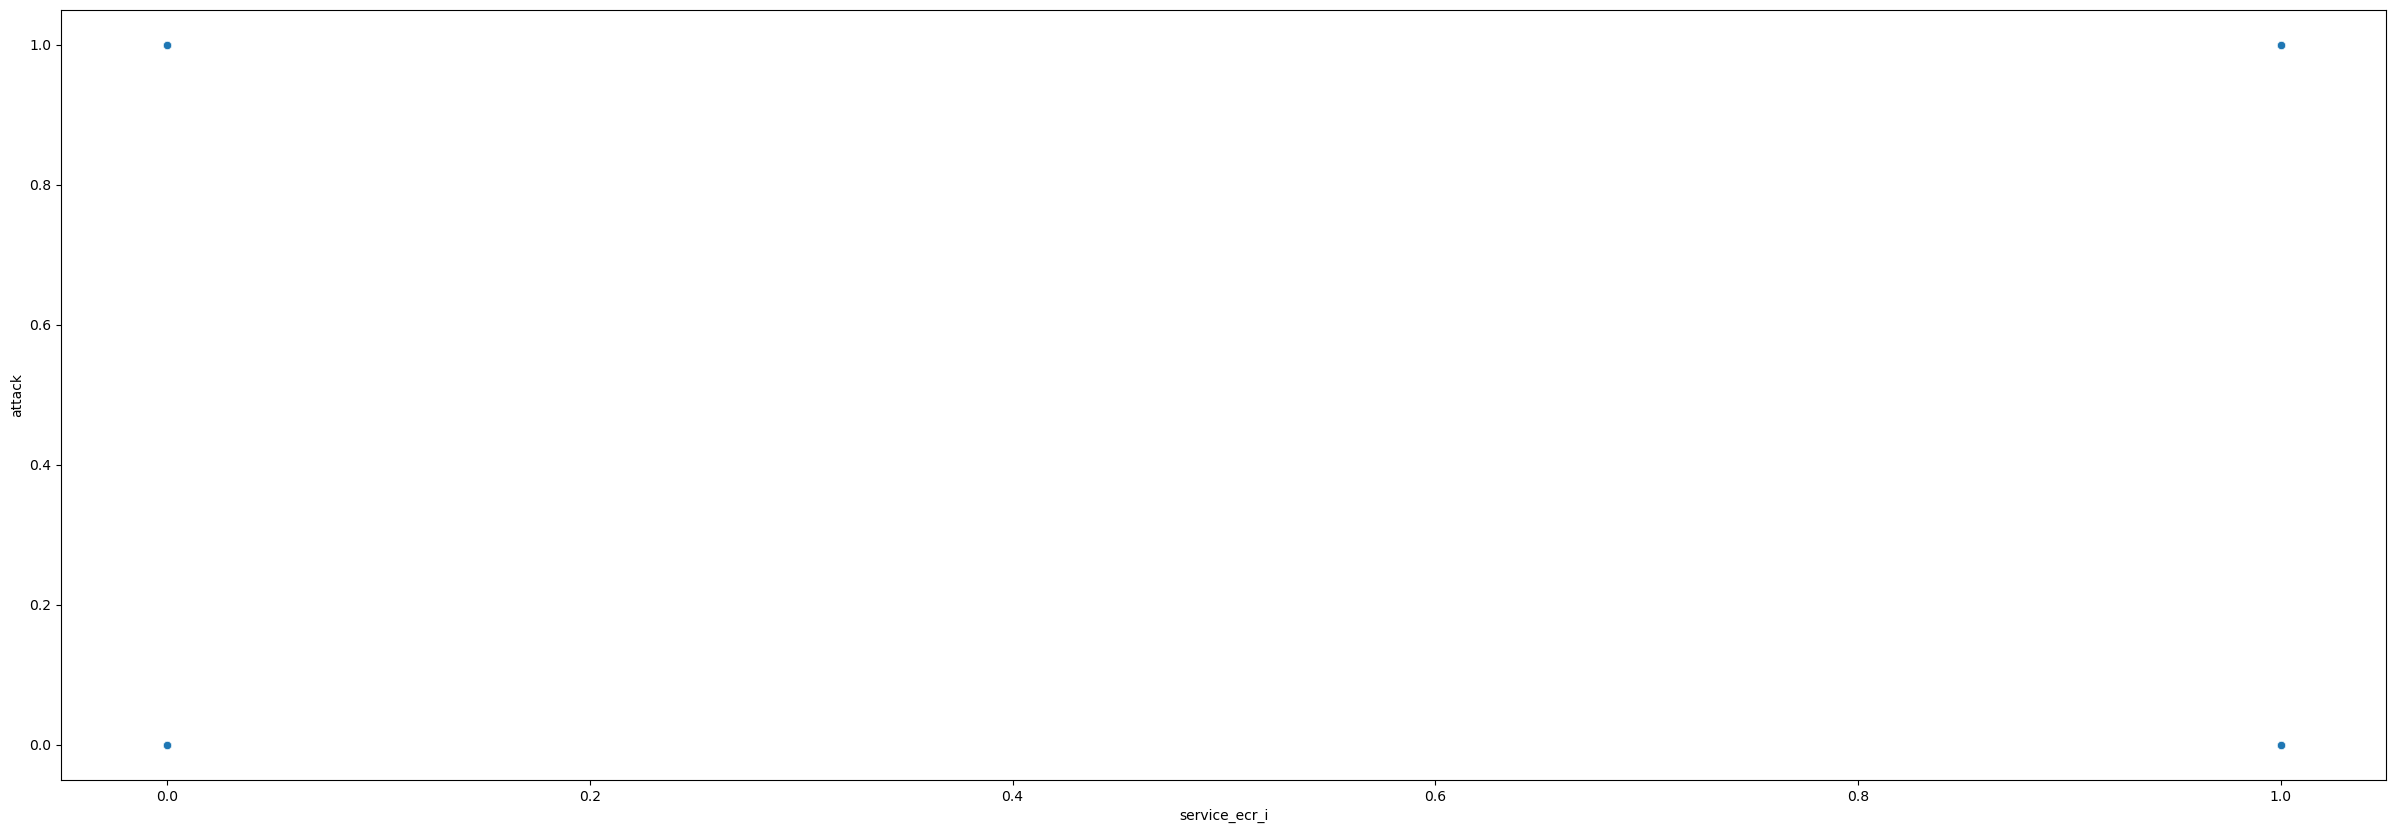

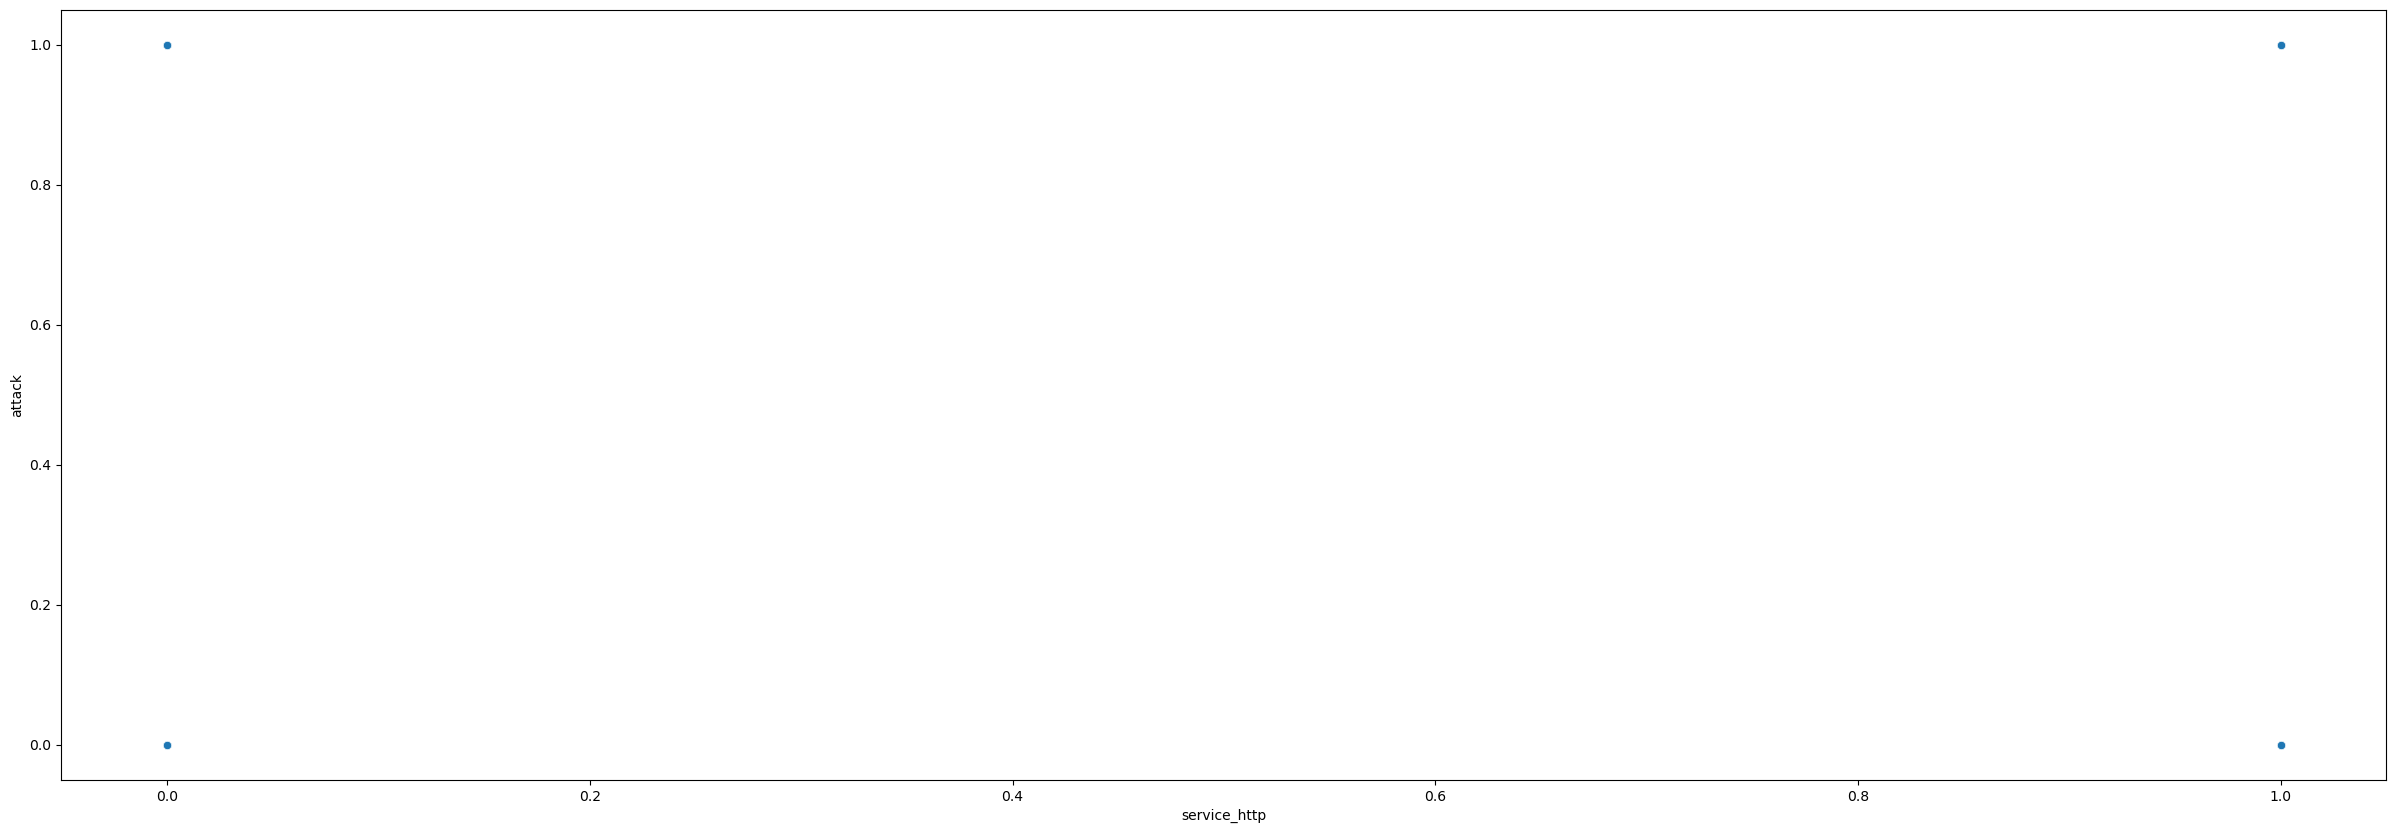

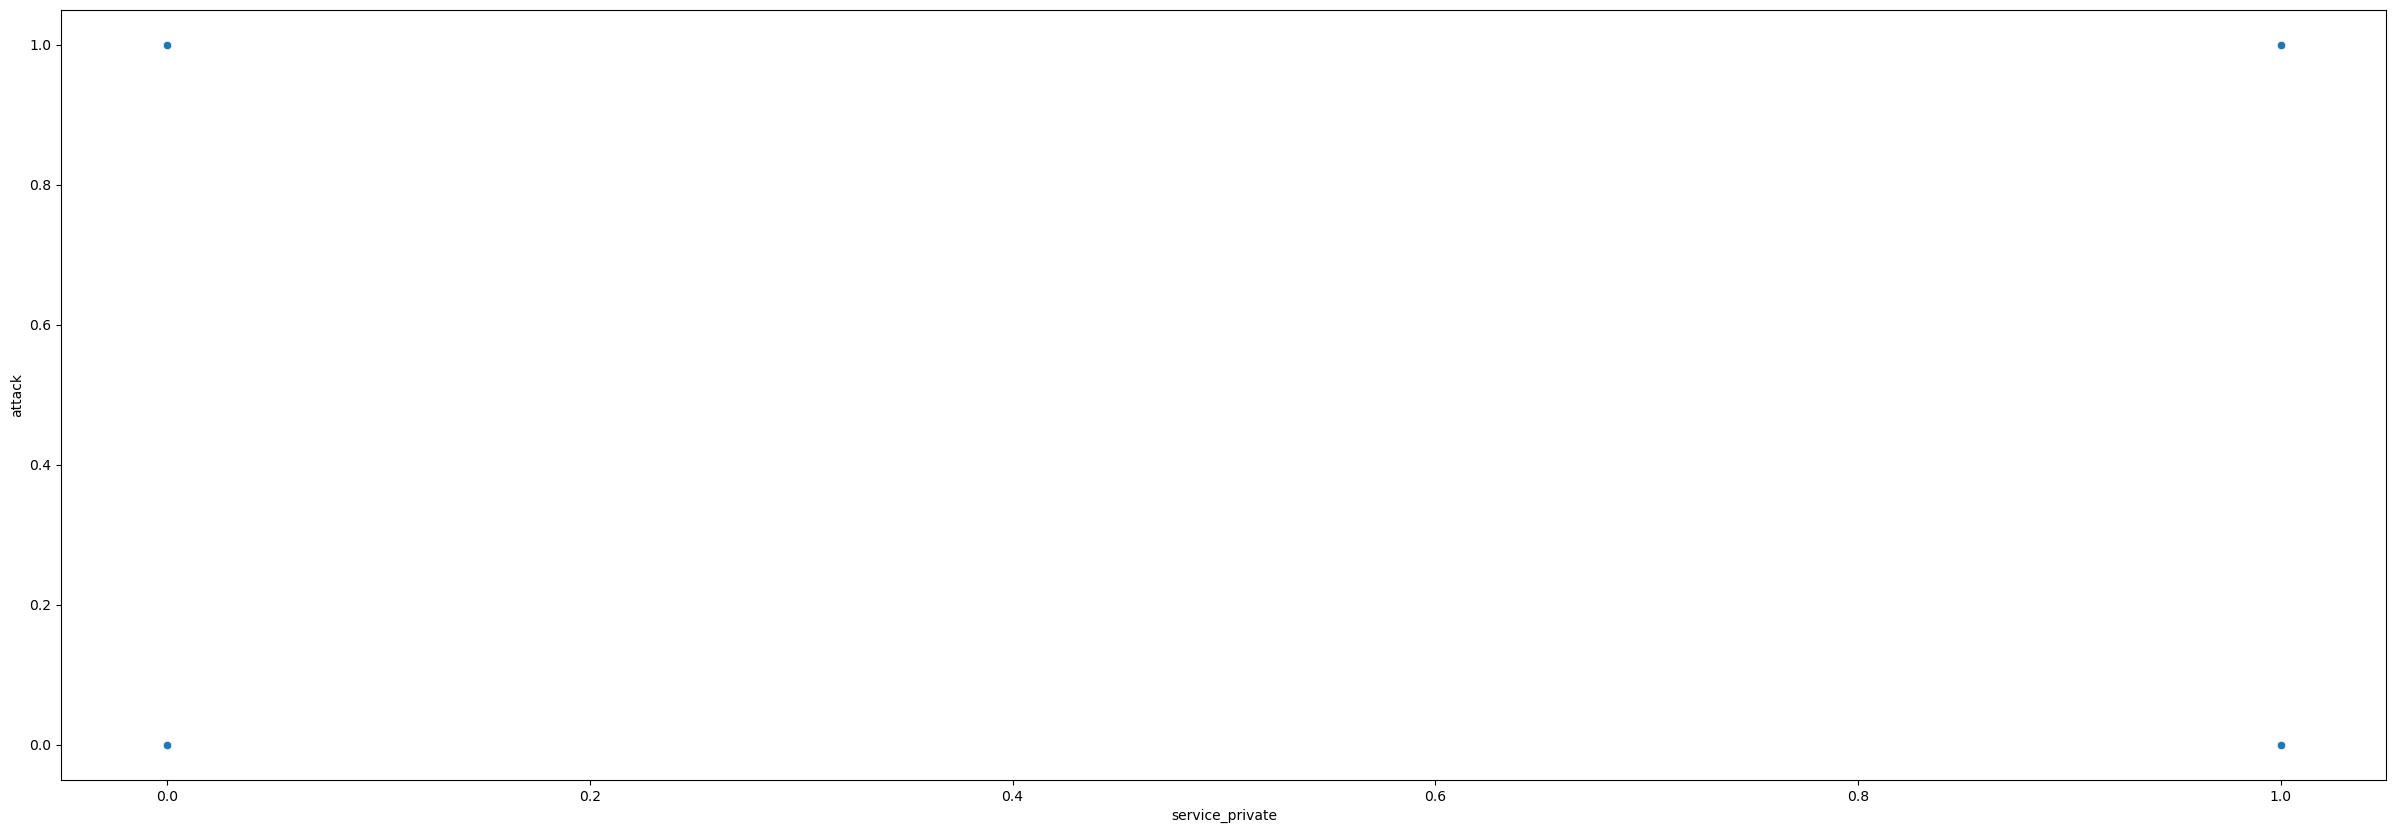

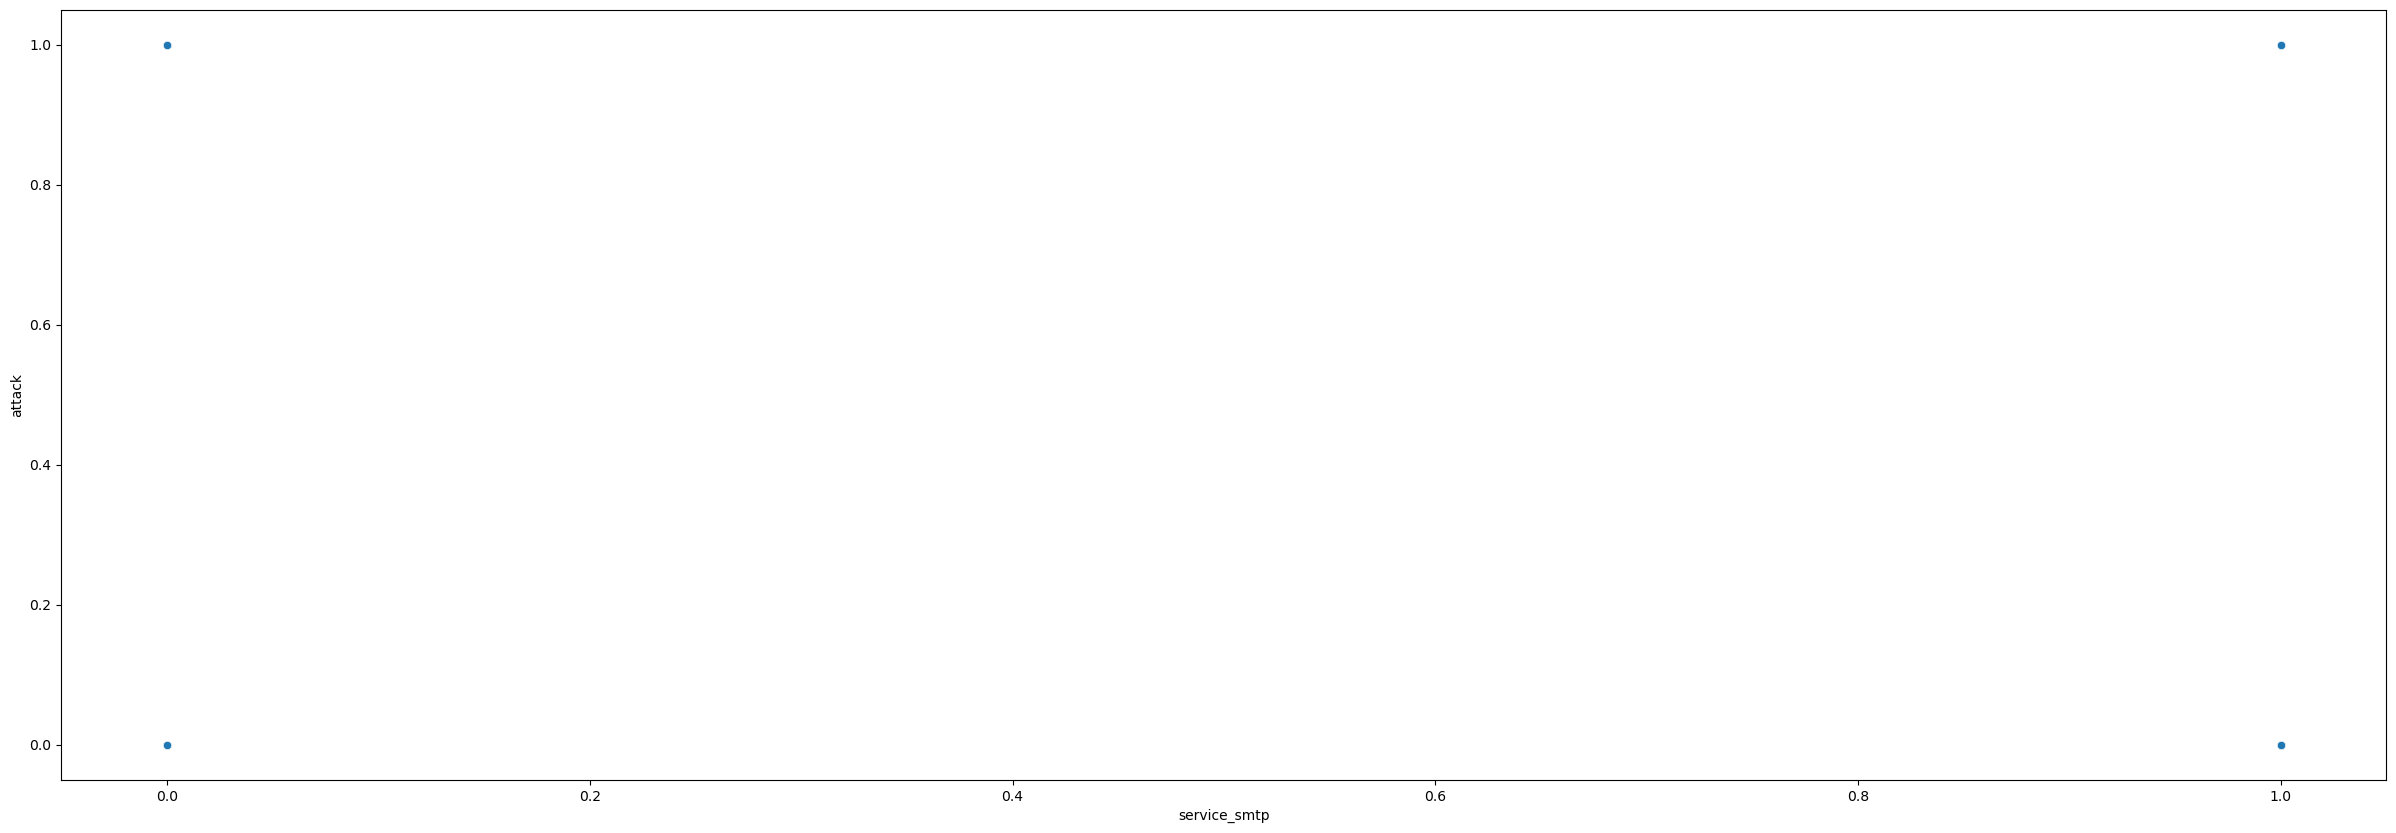

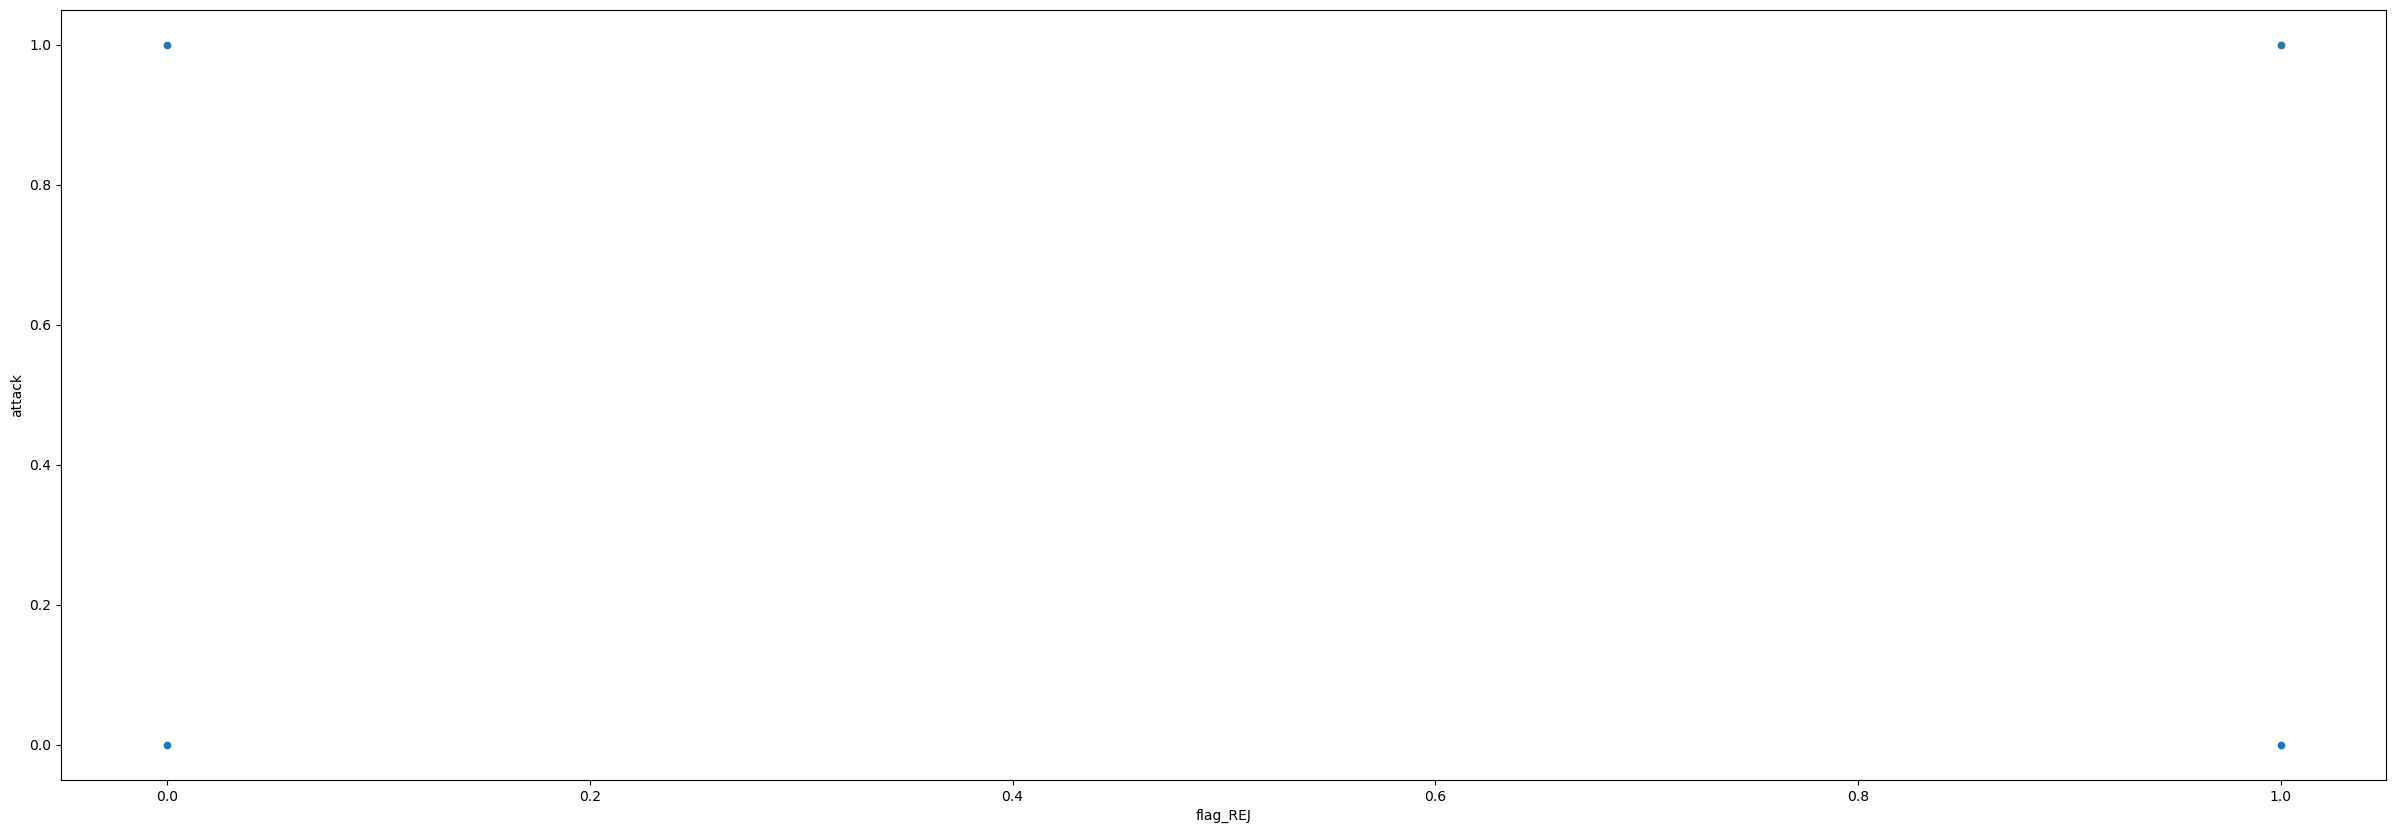

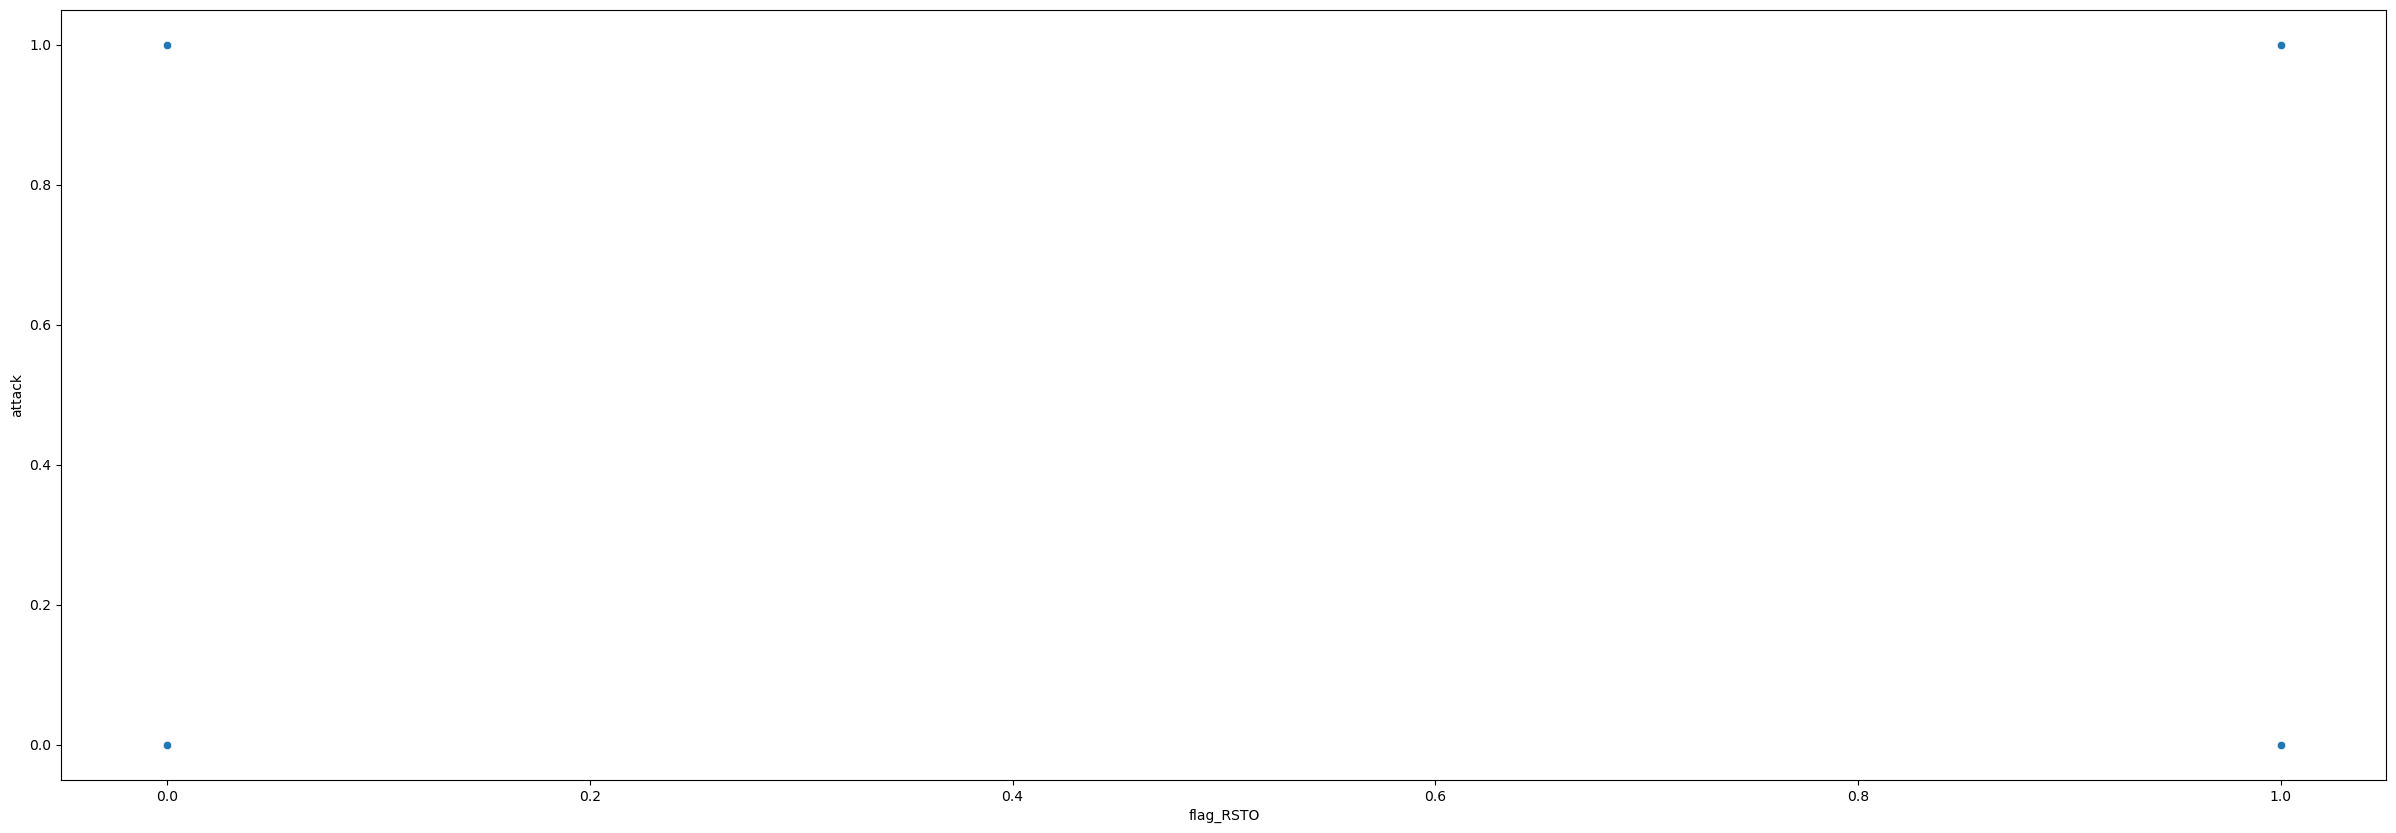

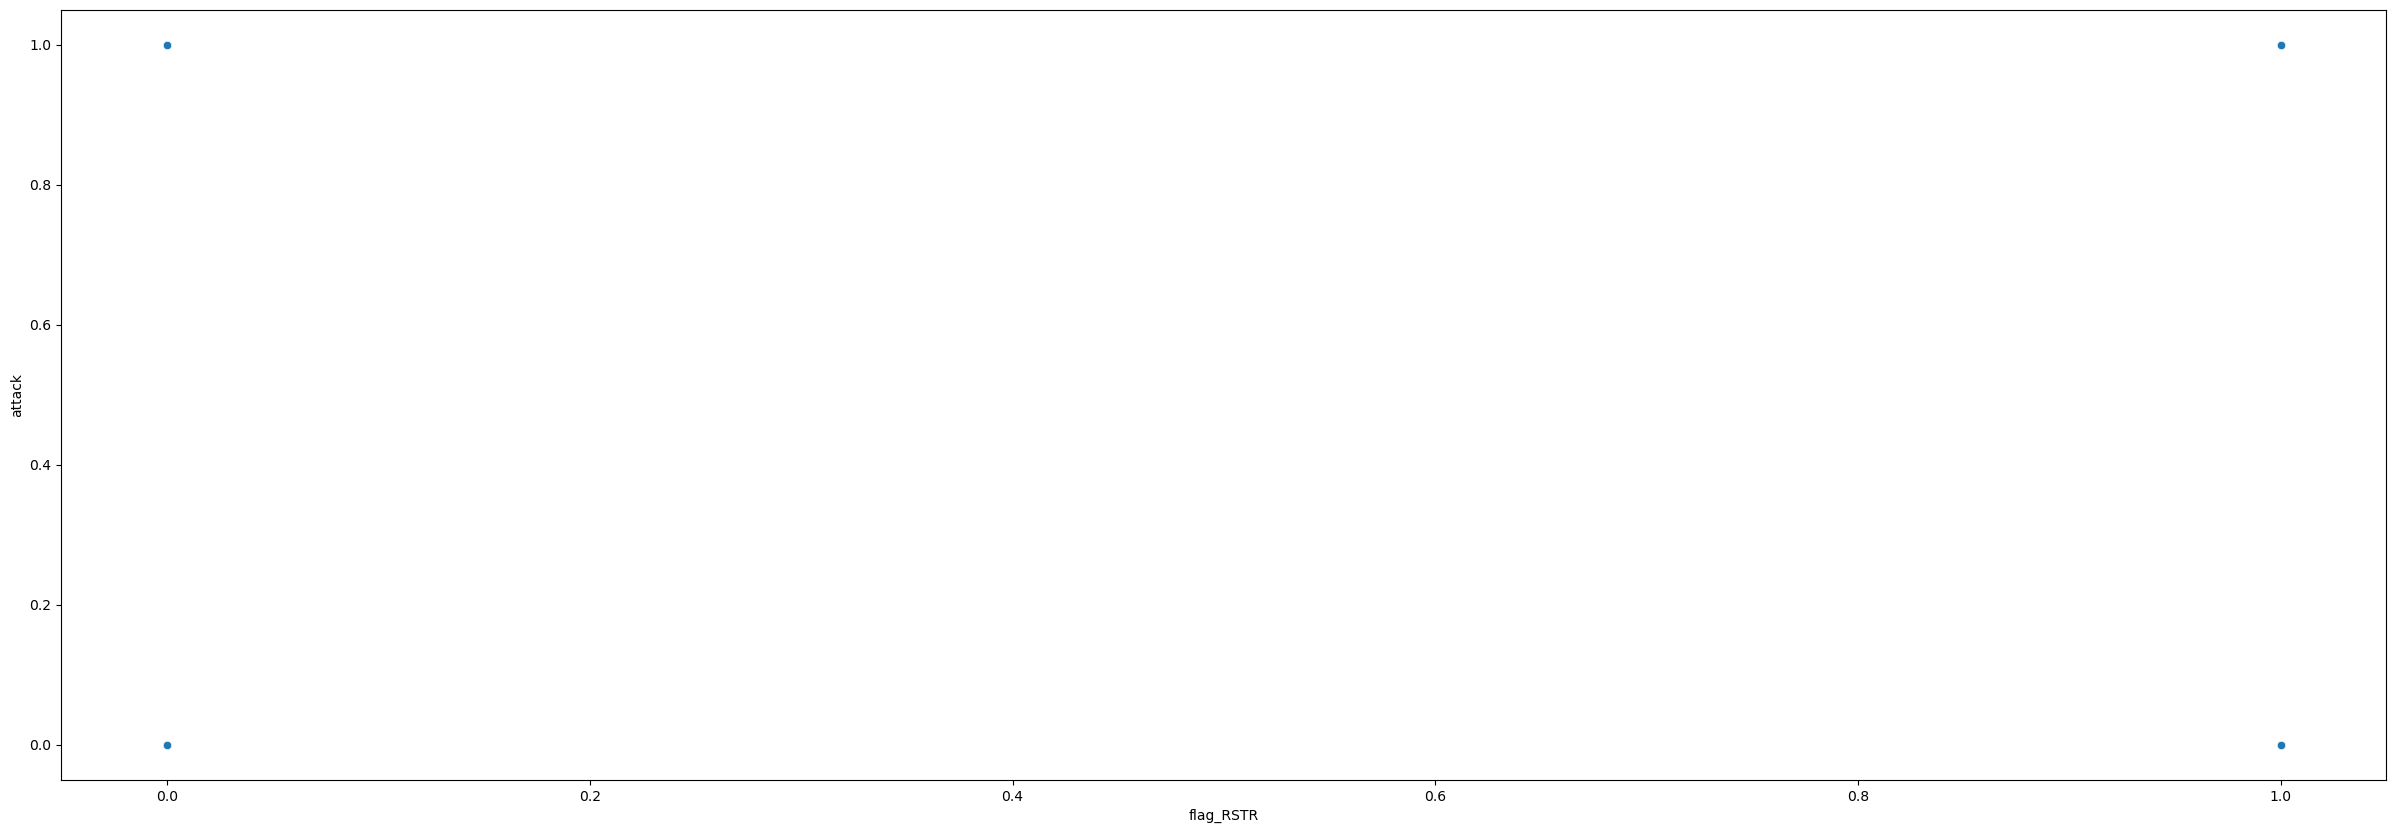

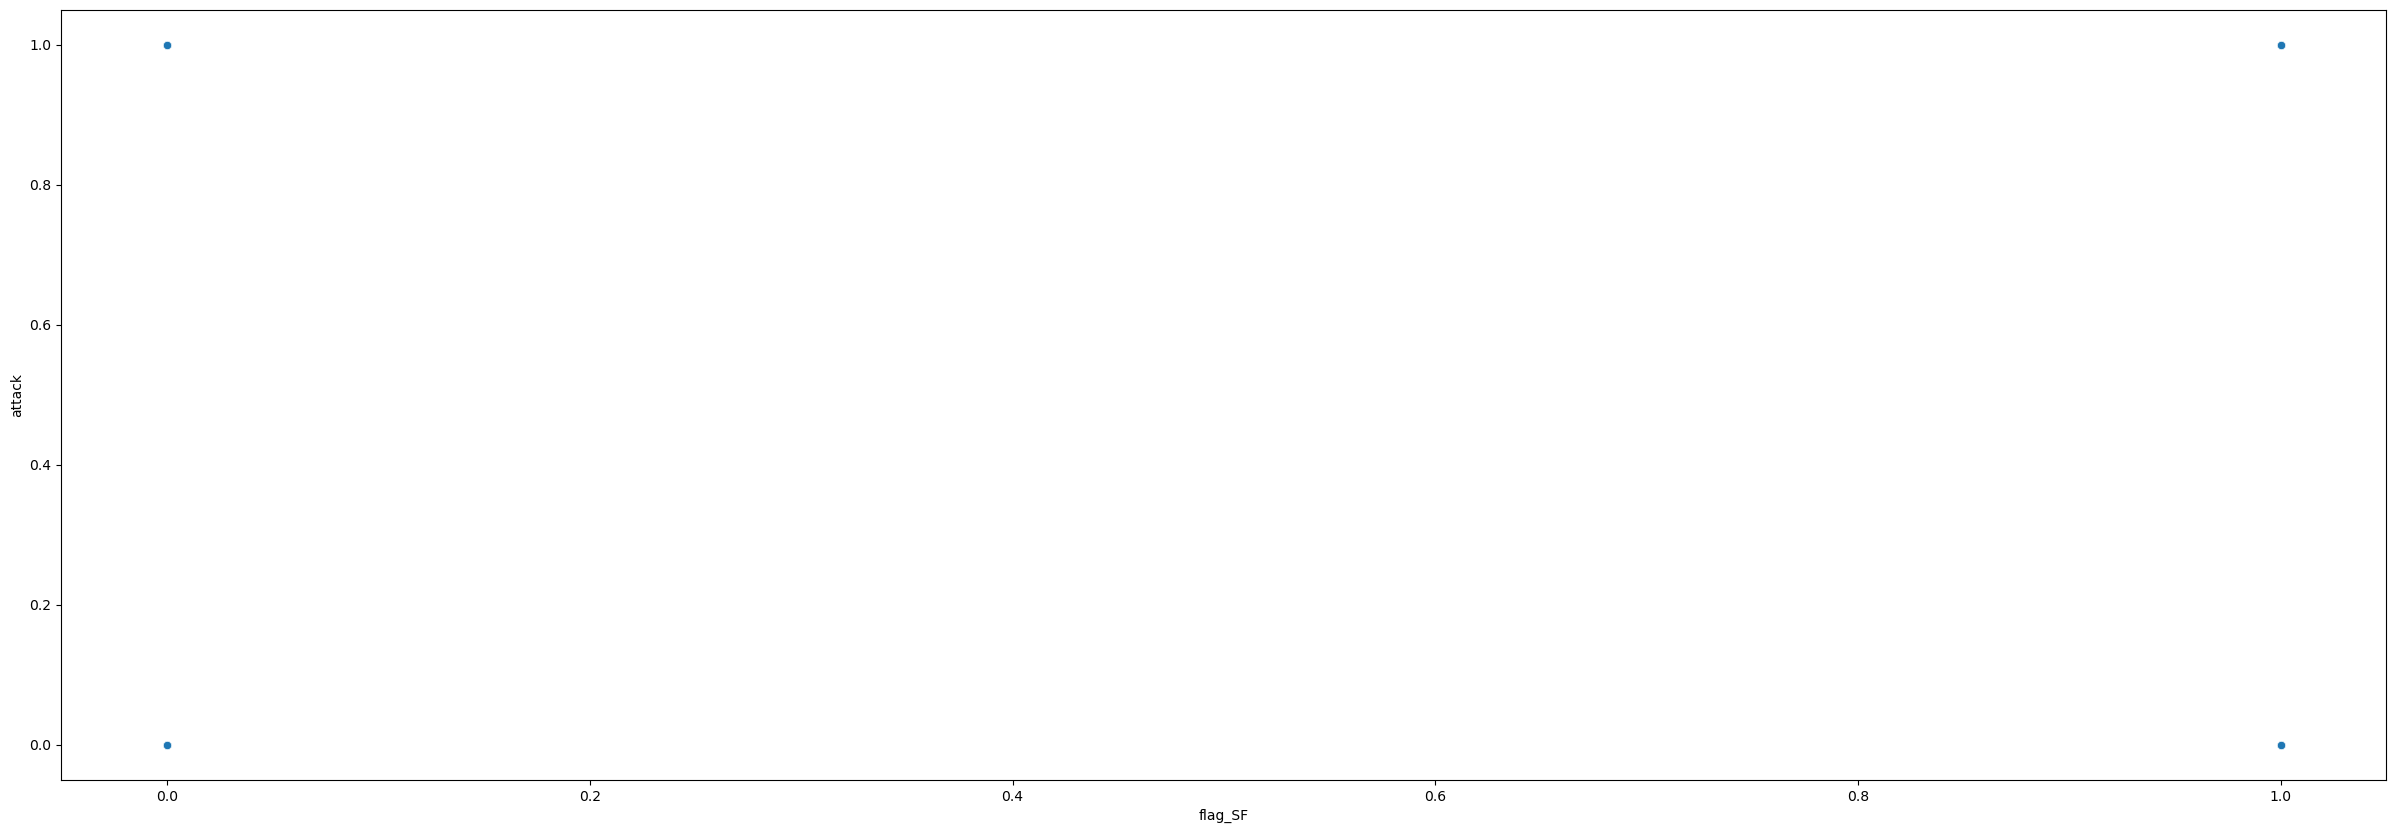

In [44]:
for i in combined_data.columns:
    fig = plt.figure(figsize = [30,10])
    sns.scatterplot(data= combined_data, x=i, y = 'attack');
    fig.show()

- There are no significant outliers.

In [45]:
# checking the size of each class of the label column(attack)
combined_data['attack'].value_counts()

0    76967
1    70940
Name: attack, dtype: int64

<AxesSubplot:xlabel='attack', ylabel='count'>

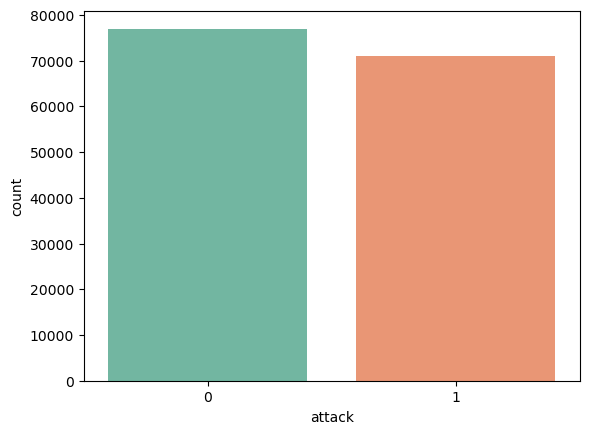

In [46]:
sns.countplot(x='attack', data=combined_data, palette='Set2')

- The classes are slightly not balanced. To make them balanced, we are going to use SMOTE to create more samples for the minority class.


# Machine learning

In [47]:
# Create our Dataset with the independent variables and the dependent variable.

X = combined_data.drop(['attack'],axis=1)
Y = combined_data['attack']

# Create a classic train-test split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

print("Train Shape: ",X_train.shape)
print("Test Shape: ",X_test.shape)

Train Shape:  (118325, 22)
Test Shape:  (29582, 22)


In [48]:
Y_test.value_counts()

0    15404
1    14178
Name: attack, dtype: int64

In [49]:
# Over-sampling
balance =  SMOTE(random_state=42)

#fitting
x_over_balanced, y_over_balanced = balance.fit_resample(X_train,Y_train)
# Scaling
scaler = MinMaxScaler()
sX_train = scaler.fit_transform(x_over_balanced)
sX_test = scaler.transform(X_test)
y_over_balanced.value_counts()

0    61563
1    61563
Name: attack, dtype: int64

- Now the classes are balanced and we have  123126 samples to do the training

## LogisticRegression model

In [50]:
# defining the logistic regression model
lr = LogisticRegression()

# defining the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg', 'lbfgs', 'saga'],
              'max_iter': [100, 500, 1000]}

# performing grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid=param_grid,cv=5)
grid_search.fit(sX_train, y_over_balanced)

# printing the best hyperparameters and training accuracy
print('Best hyperparameters: ', grid_search.best_params_)
print('Training accuracy: ', grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Training accuracy:  0.9332635071430015


Overall Accuracy: 93.33%
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     15404
           1       0.94      0.92      0.93     14178

    accuracy                           0.93     29582
   macro avg       0.93      0.93      0.93     29582
weighted avg       0.93      0.93      0.93     29582



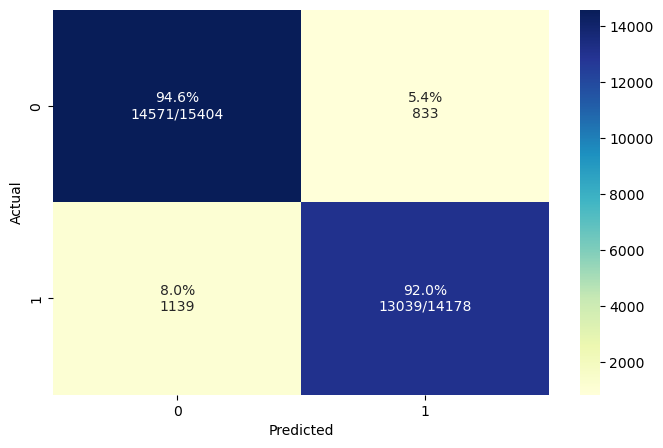

In [51]:
# defining the model 
modelLG = LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=100)

#Fitting
 
modelLG.fit(sX_train,y_over_balanced)

# making predictions for the testing dataset

y_pred = modelLG.predict(sX_test)

report_heatmap(y_pred,Y_test)


## RandomForestClassifier model

training Accuracy: 0.8659665708298816
testing Accuracy: 0.8696842674599419
depth :  1
training Accuracy: 0.8744050809739616
testing Accuracy: 0.8774254614292475
depth :  2
training Accuracy: 0.9261082143495282
testing Accuracy: 0.9273544723142452
depth :  3
training Accuracy: 0.943098939297955
testing Accuracy: 0.9436143600838348
depth :  4
training Accuracy: 0.9476146386628332
testing Accuracy: 0.9484821851125684
depth :  5
training Accuracy: 0.9513344054058445
testing Accuracy: 0.952065445203164
depth :  6
training Accuracy: 0.9540633172522457
testing Accuracy: 0.9549726184842133
depth :  7
training Accuracy: 0.9607881357308773
testing Accuracy: 0.9607531607058346
depth :  8
training Accuracy: 0.9678865552360996
testing Accuracy: 0.9670407680346157
depth :  9
training Accuracy: 0.9723047934636064
testing Accuracy: 0.9717733757014401
depth :  10
training Accuracy: 0.974984974741322
testing Accuracy: 0.9736664187681698
depth :  11
training Accuracy: 0.977868200055228
testing Accuracy: 

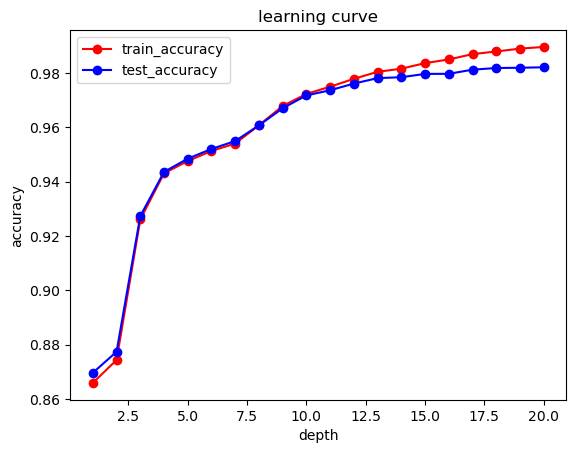

The best depth is  20
The best testing accuracy is 0.98212
The best training accuracy is 0.98961


In [53]:
# finding the best depth
test_accuracy=[]
train_accuracy=[]
depth=[]


for i in range(1,21):


    RFC_model = RandomForestClassifier( max_depth=i, random_state=101)
    RFC_model.fit(sX_train, y_over_balanced)
    y_pred = RFC_model.predict(sX_test)
    y_pred_train = RFC_model.predict(sX_train)
    print("training Accuracy:",accuracy_score(y_over_balanced, y_pred_train))
    print("testing Accuracy:",accuracy_score(Y_test, y_pred))


    print('depth : ',i)

    train_accuracy.append(accuracy_score(y_over_balanced, y_pred_train))
    test_accuracy.append(accuracy_score(Y_test, y_pred))
    depth.append(i)

plt.plot( depth, train_accuracy,'-o', label="train_accuracy", color = 'red') 
plt.plot( depth, test_accuracy, '-o',label="test_accuracy", color = 'blue')

plt.title("learning curve")
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show() 

print("The best depth is ", depth[np.argmax(test_accuracy)] ) 

best_test_accuracy = max(test_accuracy)


print(f"The best testing accuracy is {best_test_accuracy:.5f}")
print(f"The best training accuracy is {train_accuracy[np.argmax(test_accuracy)]:.5f}")

Overall Accuracy: 98.18%
--------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15404
           1       0.99      0.98      0.98     14178

    accuracy                           0.98     29582
   macro avg       0.98      0.98      0.98     29582
weighted avg       0.98      0.98      0.98     29582



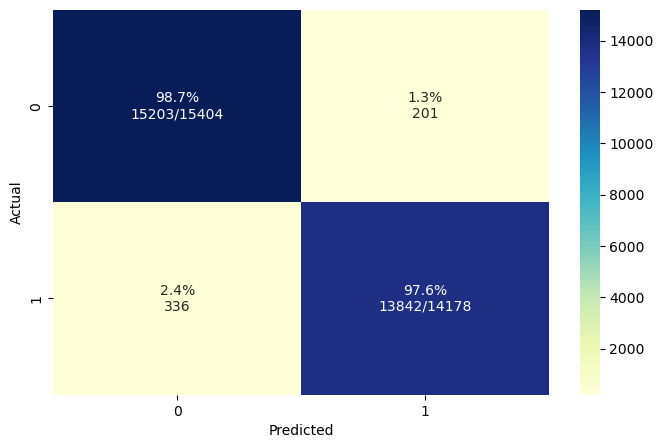

In [54]:
# defining the model (considering overfitting, we chose 18 as depth)
RFC_model = RandomForestClassifier( max_depth=18, random_state=101)

#Fitting
RFC_model.fit(sX_train,y_over_balanced)

# making predictions for the testing dataset
y_pred = RFC_model.predict(sX_test)


report_heatmap(y_pred,Y_test)

# Support Vector Classifier

Overall Accuracy: 93.52%
--------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     15404
           1       0.95      0.91      0.93     14178

    accuracy                           0.94     29582
   macro avg       0.94      0.93      0.94     29582
weighted avg       0.94      0.94      0.94     29582



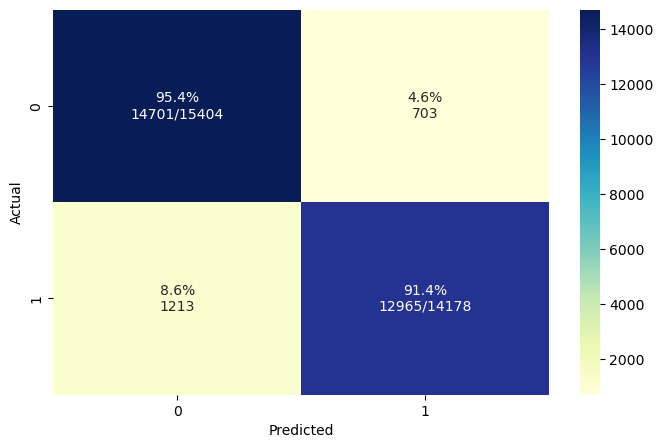

In [56]:
# Create SVC classifier  
svc = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.  

# Train the model  
svc.fit(sX_train,y_over_balanced)

# making predictions for the testing dataset
y_pred = svc.predict(sX_test)


report_heatmap(y_pred,Y_test)

# Deep Learning

In [57]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(sX_train.shape[1],)))

#model.add(Dense(50, activation='relu'))
#model.add(Dense(40, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(sX_train, y_over_balanced,batch_size=100,epochs=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                230       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
Train on 123126 samples
Epoch 1/2
123126/123126 [==============================] - 3s 25us/sample - loss: 0.1987 - accuracy: 0.9260
Epoch 2/2
123126/123126 [==============================] - 2s 18us/sample - loss: 0.1287 - accuracy: 0.9492


Overall Accuracy: 95.44%
--------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     15404
           1       0.96      0.94      0.95     14178

    accuracy                           0.95     29582
   macro avg       0.95      0.95      0.95     29582
weighted avg       0.95      0.95      0.95     29582



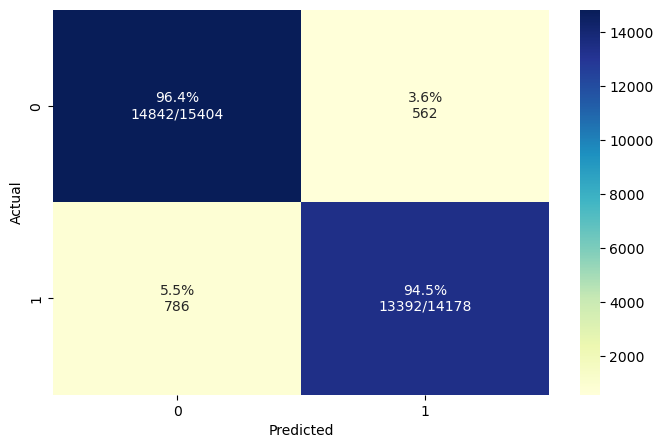

In [58]:
# making predictions for the testing dataset
y_pred1 = (model.predict(sX_test)> 0.5)


report_heatmap(y_pred1,Y_test)

In [61]:
#End